In [84]:
from functions import *

%load_ext autoreload
%aimport functions
%autoreload 1

simulation_dict = read_simulation_csv(case_list = [0, 1, 2, 3, 12, 13, 14, 15], point_multiplier = 8, add = True, s = 30e-9)
plt.rcParams['animation.embed_limit'] = 2**9
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['font.size'] = 14
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.family'] = 'Times New Roman'

palette_tab10 = sns.color_palette('bright', 10)  #'colorblind' 'tab10' 'bright'
palette_tab10 = sns.color_palette([palette_tab10[2], palette_tab10[8], palette_tab10[0], palette_tab10[1], palette_tab10[4], palette_tab10[3], palette_tab10[9], palette_tab10[5]])
markers = ["o","D","^", "*"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Astroid curve fit and visualizations:

[0.18272021091612894, 0.34153818147231424, 1.0, 1.7671235097386042, 4.705373627524767] , mse= 5.519565965858043e-08
[0.1894381144670751, 0.32986582150784466, 1.0, 1.757827628066892, 4.999999982783236] , mse= 2.4275984575751465e-07
[0.16776792730836604, 0.3248756768513836, 1.0, 1.8136469972159976, 4.999999999995968] , mse= 1.6407177888753208e-07
[0.17627088349387732, 0.31485279387733384, 1.0, 1.9219069114742358, 4.999999999999999] , mse= 1.1893640932628336e-06
[0.15204700754086914, 0.32293728992020965, 1.0, 1.9503178877903995, 4.999999999999949] , mse= 4.757444008074057e-07
[0.17606736341379123, 0.302511067755559, 1.0, 2.3503590367241274, 4.999999999999999] , mse= 2.9495599819869993e-06
[0.1397837476769818, 0.32455338799742406, 1.0, 2.1714667794123996, 4.99999999999969] , mse= 9.129106995259986e-07
[0.1984378525200562, 0.30771456001618364, 1.0, 3.4952025999820058, 4.999999999999999] , mse= 3.915846884152731e-06


C:\Users\eivhe\AppData\Local\Temp\ipykernel_10548\4008556273.py:14: RuntimeWarning: invalid value encountered in power
  return c*((1-((h_par/b)**2)**(1/gamma))**beta)**(1/2)
C:\Users\eivhe\AppData\Local\Temp\ipykernel_10548\4008556273.py:10: RuntimeWarning: invalid value encountered in power
  return b*((1-((h_perp/c)**2)**(1/beta))**gamma)**(1/2)


(-0.07865068294493793,
 0.2787339136439844,
 -0.2182816377720618,
 0.2182816377720618)

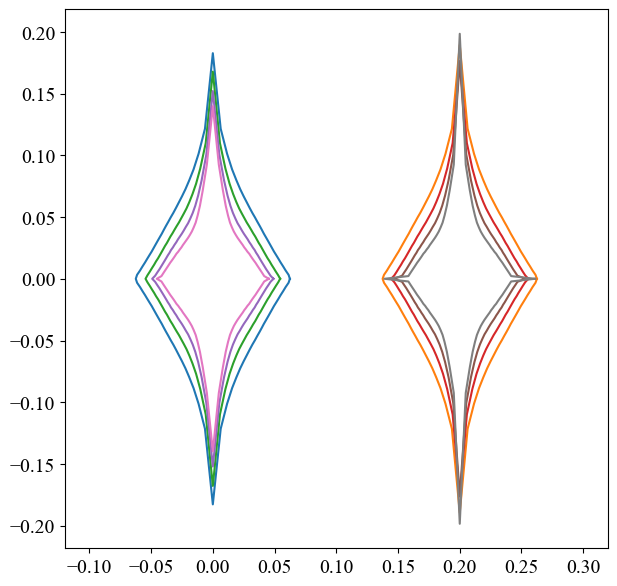

In [70]:
# Testing curve fit for b,c,beta,gamma
# Unlimited curve fit gives very large c*hc. Doesn't work better if adding estimated values for 0 and 90 deg. 
# Can limit it by putting max on gamma. Par gives better values than perp (smaller mse).

simulation_dict = read_simulation_csv(filename = 'simuleringer.csv', case_list = [0, 1, 2, 3, 12, 13, 14, 15], point_multiplier = 0,
    add = False, s = 30e-9)

def f_h_par(h_perp, b, c, beta, gamma):
    "Set hc=1, fit for b,c,beta,gamma"
    return b*((1-((h_perp/c)**2)**(1/beta))**gamma)**(1/2)

def f_h_perp(h_par, b, c, beta, gamma):
    "Set hc=1, fit for b,c,beta,gamma"
    return c*((1-((h_par/b)**2)**(1/gamma))**beta)**(1/2)

case_list = [0,1,2,3] #0,1,2,3,12,13,14,15
fig, ax = plt.subplots(figsize=[7,7])

for j in case_list:
    # For par:
    h_par,h_perp = simulation_dict[j]['h_par'],simulation_dict[j]['h_perp']
    popt, pcov = curve_fit(f_h_par, h_perp, h_par, p0= [0.1,0.3,2,4],bounds=np.array([[0.0001,0.0001,0.5,0.5], [100,100,500,5]]), maxfev=10000)
    #popt, pcov = curve_fit(f_h_par, h_perp, h_par, p0= [0.1,0.3,2,4], maxfev=10000)
    mse = np.square(np.subtract(h_par,f_h_par(h_perp,*popt))).mean() 
    # print("Curve fit par (b,c,beta,gamma): ", popt, ", mse=",mse)
    h_perp = np.concatenate([[0],h_perp,[popt[1]]])
    h_par = np.concatenate([[popt[0]],h_par,[0]])
    h_par = np.concatenate([h_par,-np.flip(h_par),-h_par,np.flip(h_par)])
    h_perp = np.concatenate([h_perp,np.flip(h_perp),-h_perp,np.flip(-h_perp)])
    plt.plot(h_par, h_perp)
    #plt.plot(f_h_par(h_perp,*popt), h_perp)
    print([popt[1],popt[0]/popt[1],1.0,popt[2],popt[3]], ", mse=",mse)
    
    # For perp:
    h_par,h_perp = simulation_dict[j]['h_par'],simulation_dict[j]['h_perp']
    popt, pcov = curve_fit(f_h_perp, h_par, h_perp, p0= [0.1,0.3,2,4],bounds=np.array([[0.0001,0.0001,0.5,0.5], [100,100,500,5]]), maxfev=10000)
    #popt, pcov = curve_fit(f_h_perp, h_par, h_perp, p0= [0.1,0.3,2,4], maxfev=10000)
    mse = np.square(np.subtract(h_perp,f_h_perp(h_par,*popt))).mean() 
    #print("Curve fit perp (b,c,beta,gamma): ", popt, ", mse=",mse)
    h_perp = np.concatenate([[0],h_perp,[popt[1]]])
    h_par = np.concatenate([[popt[0]],h_par,[0]])
    h_par = np.concatenate([h_par,np.flip(-h_par),-h_par,np.flip(h_par)])
    h_perp = np.concatenate([h_perp,np.flip(h_perp),-h_perp,np.flip(-h_perp)])
    plt.plot(h_par+0.2, h_perp)
    #plt.plot(h_par, f_h_perp(h_par,*popt)+0.2)
    #plt.plot(np.arange(0,0.082,0.001), f_h_perp(np.arange(0,0.082,0.001), *[0.082, 0.2, 1.5, 3.9]))
    print([popt[1],popt[0]/popt[1],1.0,popt[2],popt[3]], ", mse=",mse)

plt.axis('equal')
#plt.ylim(0.05, 0.2)
#plot_GSW(hc=0.2, b= 0.41, c= 1.0, beta= 1.5, gamma= 3.9, rotate_angle=90)

# plot_GSW(hc=0.168, b= 0.325, c= 1.0, beta= 1.8136, gamma= 4.5)
# plot_GSW(hc=0.168, b= 0.325, c= 1.0, beta= 1.8136, gamma= 5.0)



# Unconstrained:
# [0.18272060056720327, 0.3415373801897961, 1.0, 1.7671211437937007, 4.705395718963368] , mse= 5.5195659657606305e-08
# [0.1963703149270856, 0.31739202617776785, 1.0, 1.723931732300136, 5.401747000227468] , mse= 2.3205723116480759e-07
# [0.31695678075695616, 0.16840235436401746, 1.0, 1.5587399977887175, 15.32823731120314] , mse= 8.008574556558433e-08
# [0.43813979927541674, 0.12224434756775555, 1.0, 1.5442842135774224, 24.51504721702243] , mse= 3.189157288242834e-07
# [45.079993306358055, 0.001052049195385385, 1.0, 1.5421357504483655, 12909.382584110524] , mse= 1.6146314539330322e-07
# [75.16004499763119, 0.0006427405960713244, 1.0, 1.6445696987059057, 14079.577074709607] , mse= 9.965388700799346e-07
# [75.36760884311316, 0.0005760002920458066, 1.0, 1.6737178226656872, 15187.491665419586] , mse= 4.1843457164012057e-07
# [481.52613111355197, 9.914699724972979e-05, 1.0, 2.0556244735708593, 19200.508009972706] , mse= 2.3802119530309567e-06

# Constrained gamma<5:
# [0.18271970030073295, 0.3415394696132878, 1.0, 1.767130728056115, 4.7053320171149995] , mse= 5.519565984773383e-08
# [0.18943811305986233, 0.3298658209443792, 1.0, 1.7578275954972606, 4.99999999880266] , mse= 2.427598448424567e-07
# [0.16776806806319586, 0.3248754669429058, 1.0, 1.8136486965064573, 4.999998920979545] , mse= 1.6407183675760565e-07
# [0.17627095256969522, 0.31485277381966575, 1.0, 1.9219082095801394, 4.9999999999999964] , mse= 1.1893640933468099e-06
# [0.15204994153032186, 0.3229326597255758, 1.0, 1.9503542239806138, 4.999999692716323] , mse= 4.757444391645824e-07
# [0.17606728435659963, 0.3025110617062891, 1.0, 2.350357233517213, 4.999999999999999] , mse= 2.9495599816622706e-06
# [0.1397843944431271, 0.32455197610502673, 1.0, 2.171473265590233, 4.999999456201255] , mse= 9.129107733081665e-07
# [0.19843596379479778, 0.30771287267115494, 1.0, 3.4951434533039394, 4.999999999999999] , mse= 3.9158468852670004e-06

# par = [5.52e-08, 1.64e-07, 4.76e-07, 9.13e-07]
# perp = [2.43e-07, 1.19e-06, 2.95e-06, 3.92e-06]
# for i in range(4):
#     print(par[i]/perp[i])


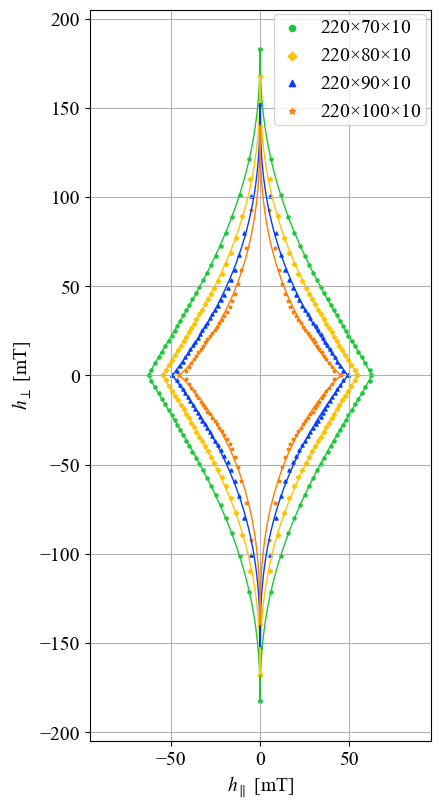

In [52]:
# Plot astroid for different widths

def plot_astroid_from_dict(simulation_dict, case_list, mode=0, angle=45, colors = None, markers = None):
    "If mode=0 plot, mode=1 scatter, mode=2 both"
    if colors==None:
        colors = ['b','orange','g','r']
    if markers==None:
        markers = ['o','o','o','o']
    for i in case_list:
        if i not in simulation_dict: 
            warnings.warn(f"Case {i} not in simulation_dict.")
            case_list.remove(i)
    angle = np.deg2rad(angle)
    for jj,j in enumerate(case_list):
        s = simulation_dict[j]
        shape,l,w,t,b,c,beta,gamma,hc,h_par,h_perp = s['shape'],s['l'],s['w'],s['t'],s['b'],s['c'],s['beta'],s['gamma'],s['hc'],s['h_par'],s['h_perp']
        h_par = np.concatenate([h_par,np.flip(-h_par),-h_par,np.flip(h_par)]) 
        h_perp = np.concatenate([h_perp,np.flip(h_perp),-h_perp,np.flip(-h_perp)]) 
        x = 1000*(h_par*np.cos(angle) + h_perp*np.sin(angle))
        y = 1000*(-h_par*np.sin(angle) + h_perp*np.cos(angle))

        nl = '\n'
        if mode==0 or mode==2:
            ax.plot(x, y, color=colors[jj], label = fr"{l:.0f}$\times${w:.0f}$\times${t:.0f},{nl}$b$={b:.3f}, $c$={c:.3f},{nl}$β$={beta:.3f}, $γ$={gamma:.3f},{nl}$hc$={hc:.3f}.")
        if mode==1 or mode==2:
            #ax.scatter(x, y,s=5, color=colors[jj], marker=markers[jj], label = fr"{l:.0f}$\times${w:.0f}$\times${t:.0f},{nl}$b$={b:.3f}, $c$={c:.3f},{nl}$β$={beta:.3f}, $γ$={gamma:.3f},{nl}$hc$={hc:.3f}.")
            ax.scatter(x, y,s=5, color=colors[jj], marker=markers[jj], label = fr"{l:.0f}$\times${w:.0f}$\times${t:.0f}")
    return

case_list = [0,1,2,3]   #0,1,2,3       #220x...x10
#case_list = [12,13,14,15]  #12,13,14,15    #220x...x20

# Plot actual data points vs curve fitted values:
fig, ax = plt.subplots(figsize=[4.4, 9.5])
plt.axis('equal')
plot_astroid_from_dict(simulation_dict, case_list, mode=1, angle=0, colors=palette_tab10, markers=markers)

for case_num in case_list:
    #print('hc:', simulation_dict[case_num]['hc'], ', b:', simulation_dict[case_num]['b'], ', c:', simulation_dict[case_num]['c'], ', beta:', simulation_dict[case_num]['beta'], ', gamma:', simulation_dict[case_num]['gamma'])
    plot_GSW(b=simulation_dict[case_num]['b'], c=simulation_dict[case_num]['c'], beta=simulation_dict[case_num]['beta'], gamma=simulation_dict[case_num]['gamma'], hc=simulation_dict[case_num]['hc'], rotate_angle=0, color=palette_tab10[case_num], linewidth=1.0)

plt.xlabel(r'$h_\parallel$ [mT]') # \mathrm{x}
plt.ylabel(r'$h_\perp$ [mT]') #\mathrm{y}

#plt.xlim(-90,90)
plt.ylim(-205,205)
plt.grid()
leg = ax.legend(loc='upper right', bbox_to_anchor=(1.015, 1.007), markerscale=2.0, borderpad=0.25, handlelength=1.3) #linewidth=1

fig.savefig('Plots\\Astroids points vs fit.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
fig.savefig('Plots\\Astroids points vs fit.png', bbox_extra_artists=(leg,), bbox_inches='tight')


if False:
    # for jj,i in enumerate(simulation_dict):
    #     print(jj,":",simulation_dict[i]['name'])

    # Get parameters
    info = simulation_dict[1]
    hc,b,c,beta,gamma = info['hc'],info['b'],info['c'],info['beta'],info['gamma']
    alpha = get_alpha(info['l']*1e-9,info['w']*1e-9,info['t']*1e-9,30e-9)
    a = (60+info['l']+info['w'])/np.sqrt(2)*1e-9
    print('a:', a, ', hc:', hc, ', b:', b, ', c:', c, ', beta:', beta, ', gamma:', gamma, ', alpha:', alpha)


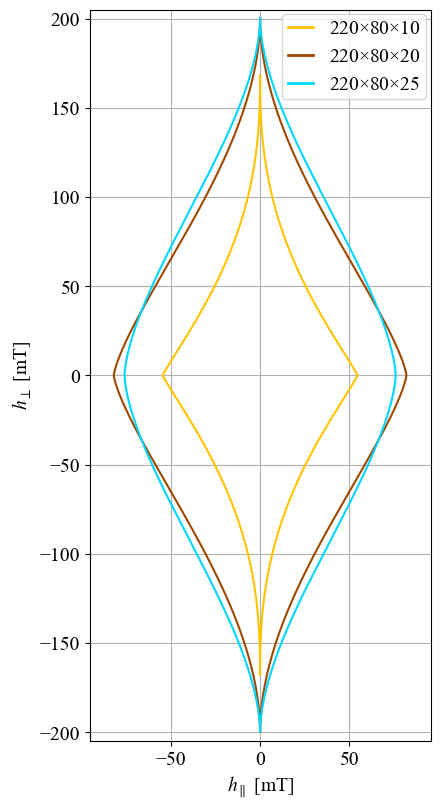

In [58]:
# Plot thickness to astroid size
fig, ax = plt.subplots(figsize=[4.4, 9.5])

plt.axis("equal")
#plt.xlim(-90,90)
plt.ylim(-205,205)
plot_GSW(b=0.325,beta=1.814,gamma=5.0,hc=0.168, label=r"220$\times$80$\times$10", color=palette_tab10[1])
plot_GSW(b=0.41,beta=1.5,gamma=3.9,hc=0.2, label=r"220$\times$80$\times$20", color=palette_tab10[7])
plot_GSW(b=0.38,beta=1.3,gamma=3.6,hc=0.2, label=r"220$\times$80$\times$25", color=palette_tab10[6])

plt.xlabel('$h_\parallel$ [mT]')
plt.ylabel('$h_\perp$ [mT]')
plt.grid()
leg = ax.legend(loc='upper right', bbox_to_anchor=(1.015, 1.007), markerscale=2.0, borderpad=0.3, handlelength=1.3) #linewidth=1
for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)

fig.savefig('Plots\\Thickness compare.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
fig.savefig('Plots\\Thickness compare.png', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

Intersections at angles:  -16.375 ,  -28.5
Optimal angles at:  0.0 ,  0.0
Optimal h:  6.65 ,  12.54
Intersections at angles:  -7.5 ,  -23.5
Optimal angles at:  0.0 ,  0.0
Optimal h:  3.04 ,  9.16


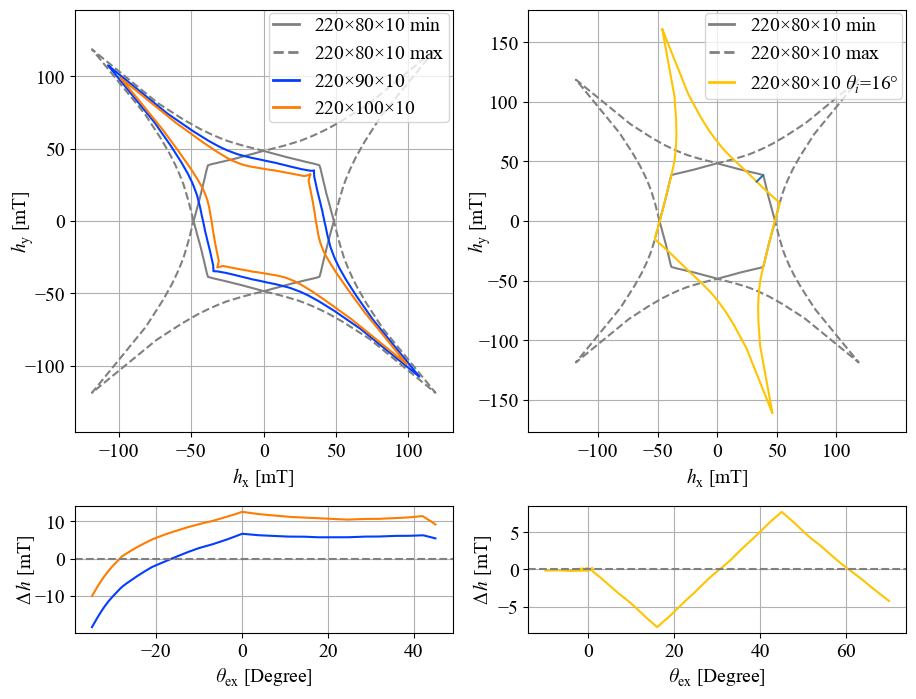

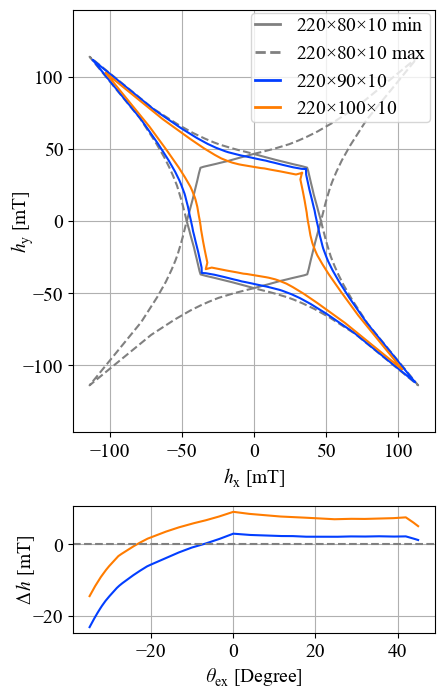

In [139]:
# Optimal angles for nuc for hc

def get_astroid_from_dict(simulation_dict):
    s = simulation_dict[1]
    shape,l,w,t,b,c,beta,gamma,hc,h_par,h_perp = s['shape'],s['l'],s['w'],s['t'],s['b'],s['c'],s['beta'],s['gamma'],s['hc'],s['h_par'],s['h_perp']
    h_par = np.concatenate([h_par,np.flip(-h_par),-h_par,np.flip(h_par)]) 
    h_perp = np.concatenate([h_perp,np.flip(h_perp),-h_perp,np.flip(-h_perp)]) 
    h_k = np.max([np.max(h_par),np.max(h_perp)])
    return 1000*h_par,1000*h_perp

def rotate(h_par, h_perp, angle):
    x = (h_par*np.cos(np.deg2rad(angle)) + h_perp*np.sin(np.deg2rad(angle)))
    y = (h_par*np.sin(np.deg2rad(angle)) -h_perp*np.cos(np.deg2rad(angle)))
    return x,y

def plot_and_find_hcdiff_0():
    simulation_dict = read_simulation_csv(case_list = [0, 1, 2, 3, 12, 13, 14, 15], point_multiplier = 8, add = True, s = 30e-9)
    s1, s2, s3 = simulation_dict[1], simulation_dict[2], simulation_dict[3]

    # Normal magnets:
    fig, axs = plt.subplots(2,2,figsize=[9.2,7], height_ratios=[5,1.5])
    axs = axs.flatten()
    fig.tight_layout(w_pad = 1.5, h_pad=2)
    b,c,beta,gamma,hc,rotate_angle = s1['b'], s1['c'], s1['beta'], s1['gamma'], s1['hc'], 45
    h_par, h_perp = s1['h_par'], s1['h_perp'] 
    h_par, h_perp = np.concatenate([h_par, -np.flip(h_par), -h_par, np.flip(h_par)]), np.concatenate([h_perp, np.flip(h_perp), -h_perp, np.flip(-h_perp)])
    rotate_angle = np.deg2rad(rotate_angle)
    x = h_par*np.cos(rotate_angle)+h_perp*np.sin(rotate_angle)
    y = h_par*np.sin(rotate_angle)-h_perp*np.cos(rotate_angle)

    x_min,y_min = x[np.all([x>=0, y>=0], axis=0)], y[np.all([x>=0, y>=0], axis=0)]
    x_min = np.sort(x_min)
    y_min = np.sort(y_min)
    x_min,y_min = np.concatenate([np.flip(x_min), -x_min, np.flip(-x_min), x_min]), np.concatenate([y_min,np.flip(y_min), -y_min, np.flip(-y_min)])
    x_max,y_max = x[np.all([x<0, y>0], axis=0)], y[np.all([x<0, y>0], axis=0)]
    x_max,y_max = np.concatenate([x_max, np.flip(-x_max),-x_max, np.flip(x_max)]), np.concatenate([y_max,np.flip(y_max), -y_max, np.flip(-y_max)])
    
    h_par_2, h_perp_2 = s2['h_par'], s2['h_perp'] 
    h_par_2, h_perp_2 = np.concatenate([h_par_2, -np.flip(h_par_2), -h_par_2, np.flip(h_par_2)]), np.concatenate([h_perp_2, np.flip(h_perp_2), -h_perp_2, np.flip(-h_perp_2)])
    x2 = h_par_2*np.cos(rotate_angle)+h_perp_2*np.sin(rotate_angle)
    y2 = h_par_2*np.sin(rotate_angle)-h_perp_2*np.cos(rotate_angle)

    h_par_3, h_perp_3 = s3['h_par'], s3['h_perp'] 
    h_par_3, h_perp_3 = np.concatenate([h_par_3, -np.flip(h_par_3), -h_par_3, np.flip(h_par_3)]), np.concatenate([h_perp_3, np.flip(h_perp_3), -h_perp_3, np.flip(-h_perp_3)])
    x3 = h_par_3*np.cos(rotate_angle)+h_perp_3*np.sin(rotate_angle)
    y3 = h_par_3*np.sin(rotate_angle)-h_perp_3*np.cos(rotate_angle)

    x_min *= 1000
    y_min *= 1000
    x_max *= 1000
    y_max *= 1000
    x2 *= 1000
    y2 *= 1000
    x3 *= 1000
    y3 *= 1000 #From T to mT

    axs[0].plot(x_min,y_min,c='gray', label=r"220$\times$80$\times$10 min")
    axs[0].plot(x_max,y_max, "--",c='gray', label=r"220$\times$80$\times$10 max")
    axs[0].plot(x2,y2, label=r"220$\times$90$\times$10", color=palette_tab10[2])
    axs[0].plot(x3,y3, label=r"220$\times$100$\times$10", color=palette_tab10[3])

    axs[0].set_xlabel(r'$h_\mathrm{x}$ [mT]')
    axs[0].set_ylabel(r'$h_\mathrm{y}$ [mT]')
    axs[0].yaxis.set_label_coords(-0.1,0.5)
    axs[0].axis('equal')
    #axs[0].set_xlim(-130,130)
    #axs[0].set_ylim(-130,130)
    axs[0].grid()
    leg = axs[0].legend(loc='upper right', bbox_to_anchor=(1.015, 1.015), markerscale=2.0, borderpad=0.2, handlelength=1.3) #linewidth=1
    for legobj in leg.legend_handles:
        legobj.set_linewidth(2.0)

    # Find differences and angles:
    alphas_min = np.arctan2(y_min,x_min)
    alphas_2 = np.arctan2(y2,x2)
    alphas_3 = np.arctan2(y3,x3)
    alpha_range = np.linspace(-35,45,641)
    h2_diff = []
    h3_diff = []

    for alpha in np.deg2rad(alpha_range):
        idx_min = np.argmin(abs(alphas_min-alpha)) 
        idx_2 = np.argmin(abs(alphas_2-alpha)) 
        idx_3 = np.argmin(abs(alphas_3-alpha)) 
        h2_diff.append(np.sqrt((y_min[idx_min]-y2[idx_2])**2 + (x_min[idx_min]-x2[idx_2])**2))
        h3_diff.append(np.sqrt((y_min[idx_min]-y3[idx_3])**2 + (x_min[idx_min]-x3[idx_3])**2)) 
    h2_diff = np.array(h2_diff)
    h3_diff = np.array(h3_diff)

    h2_min_idx = np.argmin(h2_diff)
    h3_min_idx = np.argmin(h3_diff)
    print("Intersections at angles: ", alpha_range[h2_min_idx], ", ", alpha_range[h3_min_idx])
    h2_diff = np.concatenate([-h2_diff[0:h2_min_idx], h2_diff[h2_min_idx:]])
    h3_diff = np.concatenate([-h3_diff[0:h3_min_idx], h3_diff[h3_min_idx:]])
    print("Optimal angles at: ", alpha_range[np.argmax(h2_diff)], ", ", alpha_range[np.argmax(h3_diff)])
    print("Optimal h: ", np.round(np.max(h2_diff),2), ", ", np.round(np.max(h3_diff),2))
    axs[2].plot(alpha_range, h2_diff, label=r"220$\times$90$\times$10", color=palette_tab10[2])
    axs[2].plot(alpha_range, h3_diff, label=r"220$\times$100$\times$10", color=palette_tab10[3])
    axs[2].axhline(y=0, color='grey', linestyle='--')
    axs[2].set_xlabel(r'$\theta_\mathrm{ex}$ [Degree]')
    axs[2].set_ylabel(r'$\Delta \,h$ [mT]')
    axs[2].yaxis.set_label_coords(-0.1,0.5)
    axs[2].grid()

    #ANGLE:
    # Create values:
    h_par,h_perp = get_astroid_from_dict(simulation_dict)
    x,y = rotate(h_par, h_perp, 45)
    angles = np.arctan2(y, x)
    idx = (np.abs(np.deg2rad(45) - angles)).argmin()

    x_min,y_min = x[np.all([x>=0, y>=0], axis=0)], y[np.all([x>=0, y>=0], axis=0)]
    x_min = np.sort(x_min)
    y_min = np.sort(y_min)
    x_min,y_min = np.concatenate([np.flip(x_min), -x_min, np.flip(-x_min), x_min]), np.concatenate([y_min,np.flip(y_min), -y_min, np.flip(-y_min)])
    x_max,y_max = x[np.all([x<0, y>0], axis=0)], y[np.all([x<0, y>0], axis=0)]
    x_max,y_max = np.concatenate([x_max, np.flip(-x_max),-x_max, np.flip(x_max)]), np.concatenate([y_max,np.flip(y_max), -y_max, np.flip(-y_max)])

    x_i,y_i = rotate(h_par, h_perp, 16)
    angles_i = np.arctan2(y_i, x_i)
    idx_i = (np.abs(np.deg2rad(45) - angles_i)).argmin()

    axs[1].plot(x_min,y_min,c='gray', label=r"220$\times$80$\times$10 min")
    axs[1].plot(x_max,y_max, "--",c='gray', label=r"220$\times$80$\times$10 max")
    axs[1].plot(x_i,y_i, label=r'220$\times$80$\times$10 $\theta_i$='+str(16)+r'$\degree$', color=palette_tab10[1])
    axs[1].plot([x[idx],x_i[idx_i]], [y[idx],y_i[idx_i]])
    axs[1].set_xlabel(r'$h_\mathrm{x}$ [mT]')
    axs[1].set_ylabel(r'$h_\mathrm{y}$ [mT]')
    axs[1].yaxis.set_label_coords(-0.09,0.5)
    axs[1].set_xticks(np.arange(-100, 101,50))
    axs[1].axis('equal')
    # axs[1].set_xlim(-175,175)
    # axs[1].set_ylim(-175,175)
    axs[1].grid()
    leg = axs[1].legend(loc='upper right', bbox_to_anchor=(1.015, 1.015), markerscale=2.0, borderpad=0.2, handlelength=1.3) #linewidth=1
    for legobj in leg.legend_handles:
        legobj.set_linewidth(2.0)

    # Plot full optimal for 16deg:
    x_i,y_i = rotate(h_par, h_perp, 16)
    alpha_i = np.arctan2(y_i, x_i)
    alpha_min = np.arctan2(y_min,x_min)
    alpha_range = np.linspace(-10,70,641)

    hi_diff = []
    for alpha in np.deg2rad(alpha_range):
        idx_i = np.argmin(abs(alpha_i-alpha)) 
        idx_min = np.argmin(abs(alpha_min-alpha)) 
        hi_diff.append(np.sign(y_min[idx_min]-y_i[idx_i])*np.sqrt((y_min[idx_min]-y_i[idx_i])**2 + (x_min[idx_min]-x_i[idx_i])**2))
    hi_diff = np.array(hi_diff)

    axs[3].plot(alpha_range, hi_diff, label=r"220$\times$80$\times$10 $\theta_i$="+str(16)+r'$\degree$', color=palette_tab10[1])
    axs[3].axhline(y=0, color='grey', linestyle='--')
    axs[3].set_xlabel(r'$\theta_\mathrm{ex}$ [Degree]')
    axs[3].set_ylabel(r'$\Delta \,h$ [mT]')
    axs[3].yaxis.set_label_coords(-0.09,0.5)
    axs[3].grid()

    fig.savefig(f'Plots\\Astroids full.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
    fig.savefig(f'Plots\\Astroids full.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi=600)
     
def plot_and_find_hcdiff_4():
    simulation_dict = read_simulation_csv(case_list = [0, 1, 2, 3, 12, 13, 14, 15], point_multiplier = 8, add = True, s = 30e-9)
    s1, s2, s3 = simulation_dict[1], simulation_dict[2], simulation_dict[3]

    # Normal magnets:
    fig, axs = plt.subplots(2,1,figsize=[4.5,7], height_ratios=[5,1.5])
    axs = axs.flatten()
    fig.tight_layout(w_pad = 1.5, h_pad=2)
    b,c,beta,gamma,hc,rotate_angle = s1['b'], s1['c'], s1['beta'], s1['gamma'], s1['hc'], 45
    disorder = 0.04
    h_par, h_perp = s1['h_par'], s1['h_perp'] 
    h_par, h_perp = np.concatenate([h_par, -np.flip(h_par), -h_par, np.flip(h_par)]), np.concatenate([h_perp, np.flip(h_perp), -h_perp, np.flip(-h_perp)])
    rotate_angle = np.deg2rad(rotate_angle)
    x = h_par*np.cos(rotate_angle)+h_perp*np.sin(rotate_angle)
    y = h_par*np.sin(rotate_angle)-h_perp*np.cos(rotate_angle)

    x_min,y_min = x[np.all([x>=0, y>=0], axis=0)], y[np.all([x>=0, y>=0], axis=0)]
    x_min = np.sort(x_min)
    y_min = np.sort(y_min)
    x_min,y_min = np.concatenate([np.flip(x_min), -x_min, np.flip(-x_min), x_min]), np.concatenate([y_min,np.flip(y_min), -y_min, np.flip(-y_min)])
    x_max,y_max = x[np.all([x<0, y>0], axis=0)], y[np.all([x<0, y>0], axis=0)]
    x_max,y_max = np.concatenate([x_max, np.flip(-x_max),-x_max, np.flip(x_max)]), np.concatenate([y_max,np.flip(y_max), -y_max, np.flip(-y_max)])
    
    h_par_2, h_perp_2 = s2['h_par'], s2['h_perp'] 
    h_par_2, h_perp_2 = np.concatenate([h_par_2, -np.flip(h_par_2), -h_par_2, np.flip(h_par_2)]), np.concatenate([h_perp_2, np.flip(h_perp_2), -h_perp_2, np.flip(-h_perp_2)])
    x2 = h_par_2*np.cos(rotate_angle)+h_perp_2*np.sin(rotate_angle)
    y2 = h_par_2*np.sin(rotate_angle)-h_perp_2*np.cos(rotate_angle)

    h_par_3, h_perp_3 = s3['h_par'], s3['h_perp'] 
    h_par_3, h_perp_3 = np.concatenate([h_par_3, -np.flip(h_par_3), -h_par_3, np.flip(h_par_3)]), np.concatenate([h_perp_3, np.flip(h_perp_3), -h_perp_3, np.flip(-h_perp_3)])
    x3 = h_par_3*np.cos(rotate_angle)+h_perp_3*np.sin(rotate_angle)
    y3 = h_par_3*np.sin(rotate_angle)-h_perp_3*np.cos(rotate_angle)

    x_min *= (1 - disorder)*1000
    y_min *= (1 - disorder)*1000
    x_max *= (1 - disorder)*1000
    y_max *= (1 - disorder)*1000
    x2 *= (1 + disorder)*1000
    y2 *= (1 + disorder)*1000
    x3 *= (1 + disorder)*1000
    y3 *= (1 + disorder)*1000 #From T to mT

    axs[0].plot(x_min,y_min,c='gray', label=r"220$\times$80$\times$10 min")
    axs[0].plot(x_max,y_max, "--",c='gray', label=r"220$\times$80$\times$10 max")
    axs[0].plot(x2,y2, label=r"220$\times$90$\times$10", color=palette_tab10[2])
    axs[0].plot(x3,y3, label=r"220$\times$100$\times$10", color=palette_tab10[3])

    axs[0].set_xlabel(r'$h_\mathrm{x}$ [mT]')
    axs[0].set_ylabel(r'$h_\mathrm{y}$ [mT]')
    axs[0].yaxis.set_label_coords(-0.1,0.5)
    axs[0].axis('equal')
    #axs[0].set_xlim(-130,130)
    #axs[0].set_ylim(-130,130)
    axs[0].grid()
    leg = axs[0].legend(loc='upper right', bbox_to_anchor=(1.015, 1.015), markerscale=2.0, borderpad=0.2, handlelength=1.3) #linewidth=1
    for legobj in leg.legend_handles:
        legobj.set_linewidth(2.0)

    # Find differences and angles:
    alphas_min = np.arctan2(y_min,x_min)
    alphas_2 = np.arctan2(y2,x2)
    alphas_3 = np.arctan2(y3,x3)
    alpha_range = np.linspace(-35,45,641)
    h2_diff = []
    h3_diff = []

    for alpha in np.deg2rad(alpha_range):
        idx_min = np.argmin(abs(alphas_min-alpha)) 
        idx_2 = np.argmin(abs(alphas_2-alpha)) 
        idx_3 = np.argmin(abs(alphas_3-alpha)) 
        h2_diff.append(np.sqrt((y_min[idx_min]-y2[idx_2])**2 + (x_min[idx_min]-x2[idx_2])**2))
        h3_diff.append(np.sqrt((y_min[idx_min]-y3[idx_3])**2 + (x_min[idx_min]-x3[idx_3])**2)) 
    h2_diff = np.array(h2_diff)
    h3_diff = np.array(h3_diff)

    h2_min_idx = np.argmin(h2_diff)
    h3_min_idx = np.argmin(h3_diff)
    print("Intersections at angles: ", alpha_range[h2_min_idx], ", ", alpha_range[h3_min_idx])
    h2_diff = np.concatenate([-h2_diff[0:h2_min_idx], h2_diff[h2_min_idx:]])
    h3_diff = np.concatenate([-h3_diff[0:h3_min_idx], h3_diff[h3_min_idx:]])
    print("Optimal angles at: ", alpha_range[np.argmax(h2_diff)], ", ", alpha_range[np.argmax(h3_diff)])
    print("Optimal h: ", np.round(np.max(h2_diff),2), ", ", np.round(np.max(h3_diff),2))
    axs[1].plot(alpha_range, h2_diff, label=r"220$\times$90$\times$10", color=palette_tab10[2])
    axs[1].plot(alpha_range, h3_diff, label=r"220$\times$100$\times$10", color=palette_tab10[3])
    axs[1].axhline(y=0, color='grey', linestyle='--')
    axs[1].set_xlabel(r'$\theta_\mathrm{ex}$ [Degree]')
    axs[1].set_ylabel(r'$\Delta \,h$ [mT]')
    axs[1].yaxis.set_label_coords(-0.1,0.5)
    axs[1].grid()

    fig.savefig(f'Plots\\Astroids by size 4dis.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
    fig.savefig(f'Plots\\Astroids by size 4dis.png', bbox_extra_artists=(leg,), bbox_inches='tight')
     
plot_and_find_hcdiff_0()
plot_and_find_hcdiff_4()

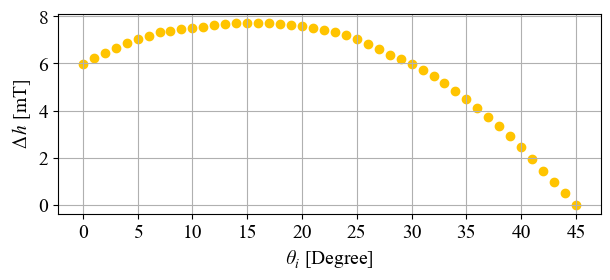

7.7251258282977275


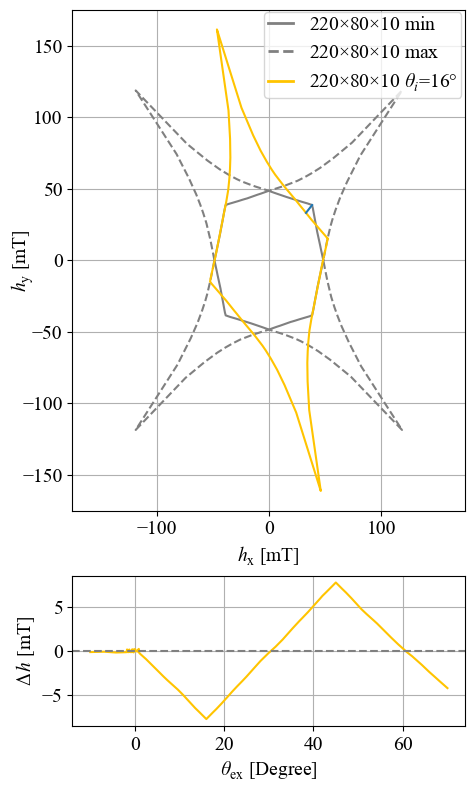

29.875 59.875
45.0


In [125]:
# Plot astroid html and optimal values for angles (OBSOLETE):

def get_astroid_from_dict(simulation_dict):
    s = simulation_dict[1]
    shape,l,w,t,b,c,beta,gamma,hc,h_par,h_perp = s['shape'],s['l'],s['w'],s['t'],s['b'],s['c'],s['beta'],s['gamma'],s['hc'],s['h_par'],s['h_perp']
    h_par = np.concatenate([h_par,np.flip(-h_par),-h_par,np.flip(h_par)]) 
    h_perp = np.concatenate([h_perp,np.flip(h_perp),-h_perp,np.flip(-h_perp)]) 
    h_k = np.max([np.max(h_par),np.max(h_perp)])
    return 1000*h_par,1000*h_perp

def rotate(h_par, h_perp, angle):
    x = (h_par*np.cos(np.deg2rad(angle)) + h_perp*np.sin(np.deg2rad(angle)))
    y = (h_par*np.sin(np.deg2rad(angle)) -h_perp*np.cos(np.deg2rad(angle)))
    return x,y

def animate_astroid(i):
    x_i,y_i = rotate(h_par, h_perp, i)
    angles_i = np.arctan2(y_i, x_i)
    idx_i = (np.abs(np.deg2rad(45) - angles_i)).argmin()
    h_diff.append(norm([np.abs(x[idx]),np.abs(y[idx])], axis=0) - norm([np.abs(x_i[idx_i]),np.abs(y_i[idx_i])], axis=0))
    plt.cla()
    plt.xlim(-175, 175)
    plt.ylim(-175, 175)
    plt.xlabel(r'$h_\mathrm{x}$ [mT]')
    plt.ylabel(r'$h_\mathrm{y}$ [mT]')
    plt.plot(x_min,y_min,c='gray', label=r"220$\times$80$\times$10 min")
    plt.plot(x_max,y_max, "--",c='gray', label=r"220$\times$80$\times$10 max")
    plt.plot(x_i,y_i, label=r'220$\times$80$\times$10 $\theta_i$='+str(i)+r'$\degree$', color=palette_tab10[1])
    plt.plot([x[idx],x_i[idx_i]], [y[idx],y_i[idx_i]])
    plt.grid()

# Create values:
h_par,h_perp = get_astroid_from_dict(simulation_dict)
x,y = rotate(h_par, h_perp, 45)
angles = np.arctan2(y, x)
idx = (np.abs(np.deg2rad(45) - angles)).argmin()

x_min,y_min = x[np.all([x>=0, y>=0], axis=0)], y[np.all([x>=0, y>=0], axis=0)]
x_min = np.sort(x_min)
y_min = np.sort(y_min)
x_min,y_min = np.concatenate([np.flip(x_min), -x_min, np.flip(-x_min), x_min]), np.concatenate([y_min,np.flip(y_min), -y_min, np.flip(-y_min)])
x_max,y_max = x[np.all([x<0, y>0], axis=0)], y[np.all([x<0, y>0], axis=0)]
x_max,y_max = np.concatenate([x_max, np.flip(-x_max),-x_max, np.flip(x_max)]), np.concatenate([y_max,np.flip(y_max), -y_max, np.flip(-y_max)])

# Plot:
fig, ax = plt.subplots(figsize=[6.4,6.4])
h_diff = []
anim = FuncAnimation(fig, animate_astroid, frames=np.arange(0,46,1), interval=300) #500
a = HTML(anim.to_jshtml()) 
plt.close()
html = a.data
with open('Astroid_angle.html', 'w') as f:
    f.write(html)
h_diff = np.array(h_diff[1:])
t = np.arange(0,46,1)

fig2, ax2 = plt.subplots(figsize=[7,2.6])
plt.scatter(t, h_diff, color=palette_tab10[1])
plt.xlabel(r'$\theta_i$ [Degree]')
plt.ylabel(r'$\Delta \,h$ [mT]')
plt.xticks(np.arange(0,46,5))
plt.grid()
fig2.savefig('Plots\\Angular rotation.pdf', bbox_inches='tight')
fig2.savefig('Plots\\Angular rotation.png', bbox_inches='tight')
plt.show()


fig3, axs3 = plt.subplots(2,1,figsize=[5.07,9.3], height_ratios=[5,1.5])
fig.tight_layout(h_pad=8)
angle = t[h_diff.argmax()]
print(h_diff.max())
x_i,y_i = rotate(h_par, h_perp, angle)
angles_i = np.arctan2(y_i, x_i)
idx_i = (np.abs(np.deg2rad(45) - angles_i)).argmin()

axs3[0].plot(x_min,y_min,c='gray', label=r"220$\times$80$\times$10 min")
axs3[0].plot(x_max,y_max, "--",c='gray', label=r"220$\times$80$\times$10 max")
axs3[0].plot(x_i,y_i, label=r'220$\times$80$\times$10 $\theta_i$='+str(angle)+r'$\degree$', color=palette_tab10[1])
axs3[0].plot([x[idx],x_i[idx_i]], [y[idx],y_i[idx_i]])
axs3[0].set_xlabel(r'$h_\mathrm{x}$ [mT]')
axs3[0].set_ylabel(r'$h_\mathrm{y}$ [mT]')
axs3[0].yaxis.set_label_coords(-0.09,0.5)
#axs3[0].axis('equal')
axs3[0].set_xlim(-175,175)
axs3[0].set_ylim(-175,175)
axs3[0].grid()
leg = axs3[0].legend(loc='upper right', bbox_to_anchor=(1.015, 1.015), markerscale=2.0, borderpad=0.2, handlelength=1.3) #linewidth=1
for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)

# Plot full optimal for 16deg:
x_i,y_i = rotate(h_par, h_perp, angle)
alpha_i = np.arctan2(y_i, x_i)
alpha_min = np.arctan2(y_min,x_min)
alpha_range = np.linspace(-10,70,641)

hi_diff = []
for alpha in np.deg2rad(alpha_range):
    idx_i = np.argmin(abs(alpha_i-alpha)) 
    idx_min = np.argmin(abs(alpha_min-alpha)) 
    hi_diff.append(np.sign(y_min[idx_min]-y_i[idx_i])*np.sqrt((y_min[idx_min]-y_i[idx_i])**2 + (x_min[idx_min]-x_i[idx_i])**2))
hi_diff = np.array(hi_diff)

axs3[1].plot(alpha_range, hi_diff, label=r"220$\times$80$\times$10 $\theta_i$="+str(angle)+r'$\degree$', color=palette_tab10[1])
axs3[1].axhline(y=0, color='grey', linestyle='--')
axs3[1].set_xlabel(r'$\theta_\mathrm{ex}$ [Degree]')
axs3[1].set_ylabel(r'$\Delta \,h$ [mT]')
axs3[1].yaxis.set_label_coords(-0.09,0.5)
axs3[1].grid()
plt.show()
fig3.savefig('Plots\\Astroids by optimal angle.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
fig3.savefig('Plots\\Astroids by optimal angle.png', bbox_extra_artists=(leg,), bbox_inches='tight')

print(alpha_range[200:320][np.argmin(abs(hi_diff[200:320]))], alpha_range[400:560][abs(np.argmin(hi_diff[400:560]))])
print(alpha_range[np.argmax(hi_diff)])

# print("Optimal angles at: ", alpha_range[np.argmax(h2_diff)], ", ", alpha_range[np.argmax(h3_diff)])
# print("Optimal h: ", np.round(np.max(h2_diff),2), ", ", np.round(np.max(h3_diff),2))


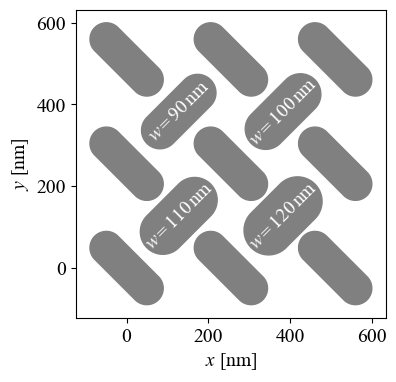

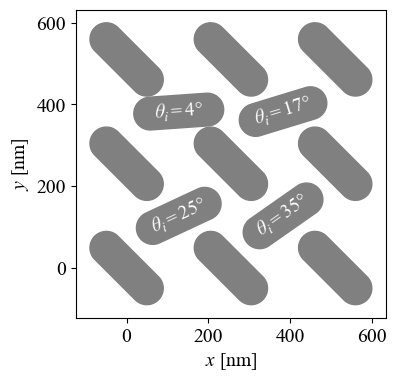

In [4]:
# Draw sizes and angle separations
def draw_magnet(pos,angle,l=220,w=80, c='grey', a=255):
    
    angles = np.linspace(0,2*np.pi,1000)
    angle = np.deg2rad(angle)
    x = w/2* np.cos(angles) 
    y = w/2* np.sin(angles)
    x = x + np.sign(x)*(l-w)/2
    x_new = x*np.cos(angle) + y*np.sin(angle)
    y_new = x*np.sin(angle) - y*np.cos(angle)
    x = x_new + pos[0]*a
    y = y_new + pos[1]*a
    plt.fill(x,y,c=c)

a= 255

fig, axs = plt.subplots(1,1, figsize=[4,4])
#plt.sca(axs[0])
[draw_magnet([i,j],-45) for i in range(3) for j in range(3) if (i,j) not in []]
draw_magnet([0.5,1.5],45,w=90)
draw_magnet([1.5,1.5],45,w=100)
draw_magnet([0.5,0.5],45,w=110)
draw_magnet([1.5,0.5],45,w=120)
plt.text(0.5*a,1.5*a,r'$w=90\,$nm', c='w', ha='center', va='center', rotation=45) 
plt.text(1.5*a,1.5*a,r'$w=100\,$nm', c='w', ha='center', va='center', rotation=45) 
plt.text(0.5*a,0.5*a,r'$w=110\,$nm', c='w', ha='center', va='center', rotation=45) 
plt.text(1.5*a,0.5*a,r'$w=120\,$nm', c='w', ha='center', va='center', rotation=45) 
plt.axis('equal')
plt.xlabel(r'$x$ [nm]')
plt.ylabel(r'$y$ [nm]')
fig.savefig('Plots\\Magnets drawn size.png', bbox_inches='tight', dpi=1000)
fig.savefig('Plots\\Magnets drawn size.pdf', bbox_inches='tight')
plt.show()

fig, axs = plt.subplots(1,1, figsize=[4,4])
[draw_magnet([i,j],-45) for i in range(3) for j in range(3) if (i,j) not in []]
#[draw_magnet([i+0.5,j+0.5],45) for i in range(2) for j in range(2)]
draw_magnet([0.5,1.5],4)
draw_magnet([1.5,1.5],17)
draw_magnet([0.5,0.5],25)
draw_magnet([1.5,0.5],35)
plt.text(0.5*a,1.5*a,r'$\theta_i=4\degree$', c='w', ha='center', va='center', rotation=4) 
plt.text(1.5*a,1.5*a,r'$\theta_i=17\degree$', c='w', ha='center', va='center', rotation=17) 
plt.text(0.5*a,0.5*a,r'$\theta_i=25\degree$', c='w', ha='center', va='center', rotation=25) 
plt.text(1.5*a,0.5*a,r'$\theta_i=35\degree$', c='w', ha='center', va='center', rotation=35) 
plt.axis('equal')
plt.xlabel(r'$x$ [nm]')
plt.ylabel(r'$y$ [nm]')
#No sense to go below 16 degrees!

fig.savefig('Plots\\Magnets drawn angle.png', bbox_inches='tight', dpi=1000)
fig.savefig('Plots\\Magnets drawn angle.pdf', bbox_inches='tight')
plt.show()

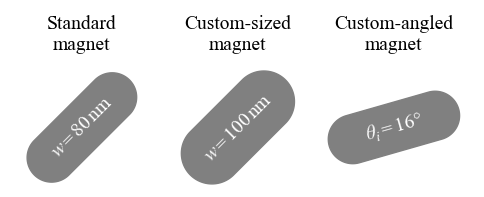

In [26]:
# Draw custom size and angle
def draw_magnet(pos,angle,l=220,w=80, c='grey', a=255):
    
    angles = np.linspace(0,2*np.pi,1000)
    angle = np.deg2rad(angle)
    x = w/2* np.cos(angles) 
    y = w/2* np.sin(angles)
    x = x + np.sign(x)*(l-w)/2
    x_new = x*np.cos(angle) + y*np.sin(angle)
    y_new = x*np.sin(angle) - y*np.cos(angle)
    x = x_new + pos[0]*a
    y = y_new + pos[1]*a
    plt.fill(x,y,c=c)

a= 255

fig, axs = plt.subplots(1,1, figsize=[6,2.3])
# [draw_magnet([i,j],-45) for i in range(3) for j in range(3) if (i,j) not in []]
draw_magnet([0.5,0.5],45)
draw_magnet([1.5,0.5],45,w=100)
draw_magnet([2.5,0.5],16)
plt.text(0.5*a,0.5*a,r'$w=80\,$nm', c='w', ha='center', va='center', rotation=45) 
plt.text(0.5*a,1.1*a,'Standard\nmagnet', c='black', ha='center', va='center') 
plt.text(1.5*a,0.5*a,r'$w=100\,$nm', c='w', ha='center', va='center', rotation=45) 
plt.text(1.5*a,1.1*a,'Custom-sized\nmagnet', c='black', ha='center', va='center') 
plt.text(2.5*a,0.5*a,r'$\theta_i=16\degree$', c='w', ha='center', va='center', rotation=16)
plt.text(2.5*a,1.1*a,'Custom-angled\nmagnet', c='black', ha='center', va='center') 
plt.axis('equal')
plt.xlim(10,770)
plt.ylim(30,320)
axs.set_axis_off()
plt.xlabel(r'$x$ [nm]')
plt.ylabel(r'$y$ [nm]')

fig.savefig('Plots\\Custom magnets.png', bbox_inches='tight', dpi=1000)
fig.savefig('Plots\\Custom magnets.pdf', bbox_inches='tight')
plt.show()



Generating data for nucleations and growth:

In [117]:
# Setup model
size = 50
normal_magnet_type = 1
s = 30e-9
neighbour_dist = 10
info = simulation_dict[normal_magnet_type]
l,w,t = info['l']*1e-9,info['w']*1e-9,info['t']*1e-9
hc,b,c,beta,gamma = info['hc'],info['b'],info['c'],info['beta'],info['gamma']
alpha = get_alpha(l,w,t,s)
model_params = {
    'size': (size,size), 
    'hc': hc, 
    'sw_b': b, 
    'sw_c': c,
    'sw_beta': beta,
    'sw_gamma': gamma,
    'alpha': alpha, 
    'use_opencl': True,
    'neighbor_distance': neighbour_dist,
}
model = PinwheelSpinIceDiamond(**model_params)

# Parameters
disorder = 0.03
alpha = 0.00100
model.set_alpha(alpha)
theta_nuc = 0 #22
defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e']  #'1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'
defect_magnet_types = [2,3] #2 is 90, 3 is 100
defect_list = [(i,j) for i in defect_magnet_types for j in defect_names]
run_range = 5


In [44]:
# Nucleate, grow, plot and store data

if not os.path.exists(f'Data\\Alpha{alpha}_Dis{disorder}'):
    os.makedirs(f'Data\\Alpha{alpha}_Dis{disorder}')

for defect_magnet_type, defect_name in tqdm(defect_list, desc ="Run", position=0, leave=True):
    defect_idxs = defect_idxs_dict_n50[defect_name]
    data_list = []
    threshold_dist_list = []
    flipped_list = []
    flipped_grow_list = []
    
    for id in range(run_range): 
        # Nucleate
        model, threshold_dist, flipped, new_data = nuclate(model=model, hc=hc, alpha=alpha, simulation_dict=simulation_dict, normal_magnet_type=normal_magnet_type, defect_name=defect_name, defect_idxs=defect_idxs, defect_magnet_type=defect_magnet_type, disorder=disorder, theta_nuc=theta_nuc, id=id)
        threshold_dist_list.append(threshold_dist)
        flipped_list.append(flipped)
        
        # Growth
        flipped_grow, H_ext, spin_end, spin = growth(model, hc, simulation_dict, normal_magnet_type, defect_idxs, defect_magnet_type, threshold_dist, flipped)
        flipped_grow_list.append(flipped_grow)
        new_data['H_ext'] = f"{H_ext:.5f}"
        new_data['Spin_end'] = f"{spin_end:.1%}"
        new_data['Spin'] = spin
        data_list.append(new_data)

    result = pd.concat(data_list, ignore_index=True)  
    nuc_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv' 
    if os.path.isfile(nuc_path):
        result.to_csv(path_or_buf=nuc_path, mode='a', index=False, header=False)
    else:
        result.to_csv(path_or_buf=nuc_path, mode='a', index=False, header=True)
    
    File_num = 0
    pickle_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_Defect_magnet_type{defect_magnet_type}_{defect_name}' 
    new_pickle_path = pickle_path
    while os.path.isfile(new_pickle_path + '.pickle'):
        new_pickle_path = pickle_path +'_'+ str(File_num)
        File_num += 1
    
    with open(new_pickle_path+'.pickle', 'wb') as file:
        pickle.dump({'Defect_magnet_type': defect_magnet_type, 'Defect_name': defect_name, 'Alpha':alpha, 'Disorder':disorder, 'Theta_nuc': theta_nuc}, file)
        if disorder==0:
            pickle.dump([],file)
        else:
            pickle.dump(threshold_dist_list, file)
        pickle.dump(flipped_list, file)
        pickle.dump(flipped_grow_list, file)
    
    # Plot growth
    flipped_grow = [j for i in flipped_grow_list for j in i]
    range_list = [0]
    for i in range(len(flipped_grow_list)): range_list.append(range_list[-1]+len(flipped_grow_list[i]))
    range_list = range_list[1:]

    fig, ax = plt.subplots(figsize=[4.8,4.8])
    ax.set_facecolor("Gray")
    anim = FuncAnimation(fig, plot_gray, frames=len(flipped_grow), fargs=(model, flipped_grow, ax, defect_magnet_type, defect_name, range_list), interval=500)
    plt.close()
    htlm = HTML(anim.to_jshtml())

    with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Plots alpha{alpha}_Dis{disorder}_Defect{defect_magnet_type}-{defect_name}.html', 'w') as f:
        f.write(htlm.data)

#20 min for 5 runs for 1/2 of cases



Run:   0%|          | 0/16 [00:00<?, ?it/s]C:\Users\eivhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyopencl\cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(
Run: 100%|██████████| 16/16 [37:48<00:00, 141.78s/it]


In [8]:
# Joining htmls

# All in one:
html_list = []
for defect_magnet_type, defect_name in tqdm(defect_list, desc ="Run", position=0, leave=True):
    with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Plots alpha{alpha}_Dis{disorder}_Defect{defect_magnet_type}-{defect_name}.html', 'r') as f:
        html_list.append(f.read())
with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Plots alpha{alpha}_Dis{disorder}.html', 'w') as f:
    f.write(f"</title>\n</head> <body><h1>Alpha:{alpha}, disorder {disorder}</h1>") 
    for a in html_list:
        f.write(a)

# Divided:
# for defect_magnet_type in defect_magnet_types:
#     html_list = []
#     for defect_name in defect_names:
#         with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Plots alpha{alpha}_Dis{disorder}_Defect{defect_magnet_type}-{defect_name}.html', 'r') as f:
#             html_list.append(f.read())

#     with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Plots alpha{alpha}_Dis{disorder}_Defect{case_to_name[defect_magnet_type]}.html', 'w') as f:
#         f.write(f"</title>\n</head> <body><h1>Alpha:{alpha}, disorder {disorder}, defect{case_to_name[defect_magnet_type]}</h1>") 
#         for a in html_list:
#             f.write(a)

In [2]:
# Create plot manually
html_list = []
for defect_magnet_type, defect_name in tqdm([(i,j) for i in defect_magnet_types for j in defect_names], desc ="Run", position=0, leave=True):
    flipped_grow_list = []
    defect_idxs = defect_idxs_dict_n50[defect_name]
    pickle_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_Defect_magnet_type{defect_magnet_type}_{defect_name}.pickle'
    with open(pickle_path, 'rb') as file:
        meta_list = pickle.load(file)
        threshold_dist_list = pickle.load(file)
        flipped_list = pickle.load(file)
        flipped_grow_list = pickle.load(file)
    
    flipped_grow = [j for i in flipped_grow_list for j in i]
    fig, ax = plt.subplots(figsize=[4.8,4.8])
    ax.set_facecolor("Gray")
    anim = FuncAnimation(fig, plot_gray, frames=len(flipped_grow), fargs=(model, flipped_grow, ax), interval=500)
    plt.close()
    html_list.append(HTML(anim.to_jshtml()))

with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Plots alpha{alpha}_Dis{disorder}.html', 'w') as f:
    for j,a in enumerate(html_list):
        f.write(a.data)

NameError: name 'tqdm' is not defined

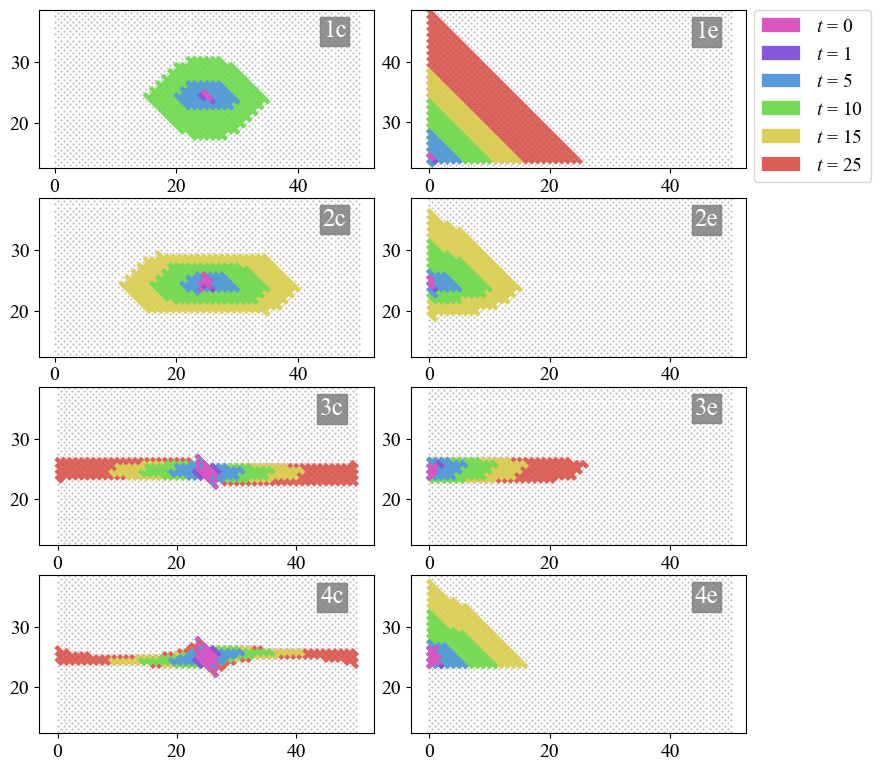

In [237]:
# Create rainbow plot:

def alpha_shape(points, alpha=0.7):
    """
    Cite Hanniel (2018): https://stackoverflow.com/questions/50549128/boundary-enclosing-a-given-set-of-points. \n
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"
    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges: # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"  
            edges.remove((j, i))    # if both neighboring triangles are in shape, it's not a boundary edge
            return
        edges.add((i, j))
    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return list(edges)

def sort_edges(edges: list):
    edges_indicies_sorted = [edges[0][0], edges[0][1]]
    while len(edges_indicies_sorted)<=len(edges):
        num = edges_indicies_sorted[-1]
        for i,j in edges:
            if i==num:
                edges_indicies_sorted.append(j)
    return np.array(edges_indicies_sorted)

def plot_rainbow(points, color, ax, label="", linewidth=0.2, legend=True): 
    #linewidth=1.5
    # assert len(points)>0
    # if len(points)>3:
    #     edges = alpha_shape(points)
    #     edge_indicies = sort_edges(edges)
    #     x,y = points[edge_indicies,0], points[edge_indicies,1]
    #     plt.fill(x,y,c=color, label=label, linewidth=3)
    # else:
    for j,pt in enumerate(points):
        pad = 0.5
        x = [pt[0]-pad, pt[0], pt[0]+pad, pt[0]]
        y = [pt[1], pt[1]-pad, pt[1], pt[1]+pad]
        if j==0 and legend:
            ax.fill(x,y,c=color, label=label, linewidth=linewidth, edgecolor=color)
        else:
            ax.fill(x,y,c=color, linewidth=linewidth, edgecolor=color)
        

defect_names = ['1c', '1e', '2c', '2e', '3c', '3e', '4c', '4e']  #'1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'
defect_magnet_type = 2 #2 is 90, 3 is 100
angle_run = True

pos = model.pos
run_num = 0
rainbow_idxs = [0,1,5,10,15,25]
palette = sns.color_palette("hls",7)
palette.pop(3)

fig, axs = plt.subplots(4,2,figsize=[8, 8])
fig.tight_layout(h_pad=-0.25, w_pad=-0.75)
axs = axs.flatten()
fig_i = 0

for defect_name in defect_names:
    defect_idxs = defect_idxs_dict_n50[defect_name]
    if angle_run:
        pickle_path = f'Data\\Angle_Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_{defect_name}.pickle'
    else:
        pickle_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_Defect_magnet_type{defect_magnet_type}_{defect_name}.pickle'
    with open(pickle_path, 'rb') as file:
        meta_list = pickle.load(file)
        threshold_dist_list = pickle.load(file)
        flipped_list = pickle.load(file)
        flipped_grow_list = pickle.load(file)
    
    axs[fig_i].scatter(pos[:,0], pos[:,1], s=0.1, c='gray', alpha=0.9)
    if defect_name == '1e' and angle_run:
        axs[fig_i].text(46,45,f'{defect_name}', c='w', fontsize=18, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
    else:
        axs[fig_i].text(46,35,f'{defect_name}', c='w', fontsize=18, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
    axs[fig_i].axis('equal')
    for i,idx in enumerate(reversed(rainbow_idxs)):
        if idx<len(flipped_grow_list[run_num]):
            plot_rainbow(pos[flipped_grow_list[run_num][idx]], palette[i], axs[fig_i], label= f"$t$ = {idx}")
    axs[fig_i].set_ylim(13,38)
    if defect_name == '1e' and angle_run:
        axs[fig_i].set_ylim(23,48)
    fig_i += 1
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.977), reverse = True)  
if angle_run:
    fig.savefig(f"Rainbow\\Angle_{disorder}dis_{alpha}alpha-all.png", bbox_inches='tight', dpi=1000)
else:  
    fig.savefig(f"Rainbow\\{disorder}dis_{alpha}alpha_{defect_magnet_type}-all.png", bbox_inches='tight', dpi=1000)


Analyse data:

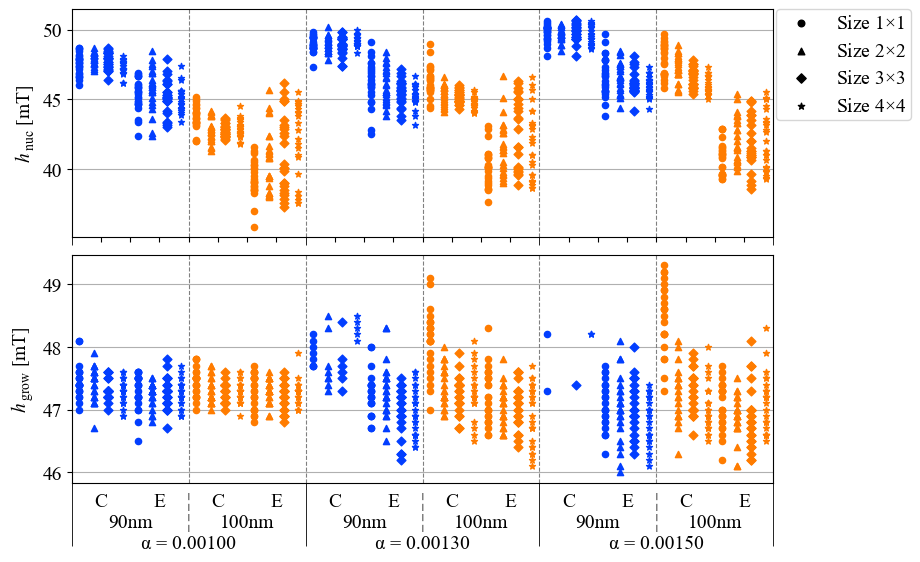

In [7]:
# Get field strengths size 0dis
defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'] 
defect_magnet_types = [2,3]
alphas = [0.001,0.0013,0.0015] #[0.0006,0.00085,0.001,0.0012,0.0015]
disorder = 0.03

fig, axs = plt.subplots(2,1,figsize=[8, 5.5], sharex=True)
fig.tight_layout(h_pad=0)
xticks_minor = np.arange(len(alphas)+1)*8
xticks = np.delete(np.arange(0,len(alphas)*8+1,1),xticks_minor)
axs[1].set_xlim(0, len(alphas)*8)
axs[1].set_xticks( xticks )
axs[1].set_xticks( xticks_minor, minor=True )
axs[0].grid(axis='y')
axs[0].set_axisbelow(True)
axs[1].grid(axis='y')
axs[1].set_axisbelow(True)
for i in range(4,len(alphas)*8,4):
    axs[0].axvline(i, linestyle='--', color='gray', linewidth=0.8)
    axs[1].axvline(i, linestyle='--', color='gray', linewidth=0.8)
axs[0].tick_params( axis='x', which='minor', direction='out', length=6)
axs[1].tick_params( axis='x', which='minor', direction='out', length=45)
axs[1].tick_params( axis='x', which='major', bottom=False) 
axs[0].set_ylabel(r"$h\,_\mathrm{nuc}$ [mT]")
axs[1].set_ylabel(r"$h\,_\mathrm{grow}$ [mT]")

palette = sns.color_palette('bright', 10)
markers = ["o","^","D", "*"]
x_labels = []
i = 0.25

for alpha in alphas:
    x_labels.extend( ['C',f'\n90nm', 'E', f'¦\n¦\nα = {alpha:.5f}','C',f'\n100nm', 'E'] )
    data_df = pd.read_csv(f'Data\\Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv')
    for defect_magnet_type in defect_magnet_types:
        if defect_magnet_type==2:
            color = palette[0]
        else:
            color = palette[1]
        for defect_name in defect_names:
            marker = markers[int(defect_name[0])-1]
            case_df = data_df[(data_df['Defect_magnet_type'] == defect_magnet_type) & (data_df['Defect_name'] == defect_name)]
            H_nuc_array = np.round(case_df['H_nuc'].values*1000, 1)
            H_ext_array = np.round(case_df['H_ext'].values*1000, 1)
            if i<2:
                axs[0].scatter(i,H_nuc_array[0],color='black',marker=marker,s=0.1, label=f"Size {defect_name[0]}"+r'$\times$'+f"{defect_name[0]}")
            s = 20  
            axs[0].scatter([i]*H_nuc_array.shape[0],H_nuc_array,color=color,marker=marker,s=s)
            if not (alpha==0.00120 and defect_magnet_type==2 and defect_name in ['3e', '4e']) or (alpha==0.00120 and defect_magnet_type==3 and defect_name=='4c') or (alpha==0.00150 and defect_magnet_type==3 and defect_name=='4c'):
                for val in H_ext_array:
                    if val not in [20.1, 40.1]:
                        axs[1].scatter(i,val,color=color,marker=marker,s=s)
            i+=0.5

axs[1].set_xticklabels( x_labels )
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.967), markerscale=15, borderpad=0.25)  
fig.savefig(f"Rainbow\\{disorder}dis_plot.png", bbox_inches='tight', dpi=1000)

plt.show()         

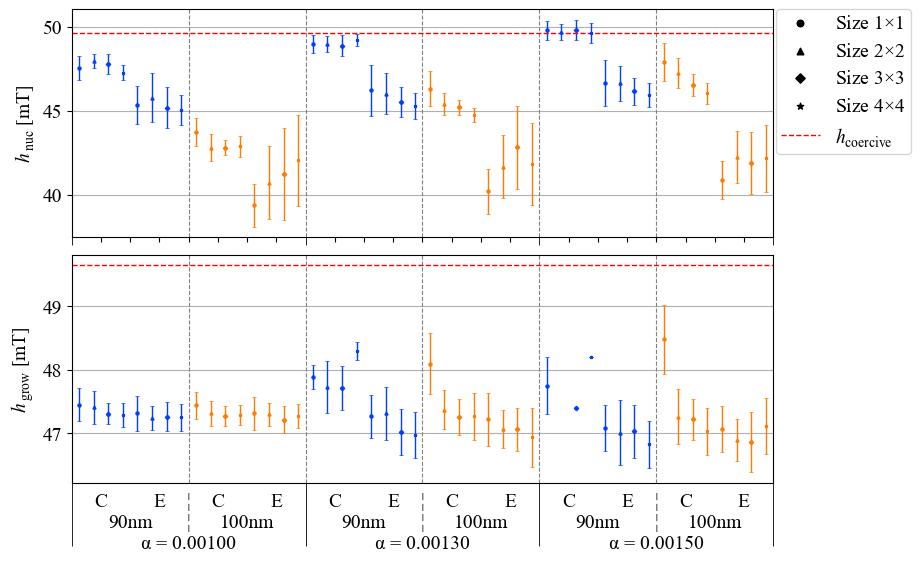

In [134]:
# Get field strengths size 3-4dis unfiltered
defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'] 
defect_magnet_types = [2,3]
disorder = 0.03

if disorder==0.03:
    alphas = [0.001,0.0013,0.0015]
else:
    alphas = [0.0006,0.00085,0.0013,0.0015,0.0018]

fig, axs = plt.subplots(2,1,figsize=[8, 5.5], sharex=True)
fig.tight_layout(h_pad=0)
xticks_minor = np.arange(len(alphas)+1)*8
xticks = np.delete(np.arange(0,len(alphas)*8+1,1),xticks_minor)
axs[1].set_xlim(0, len(alphas)*8)
axs[1].set_xticks( xticks )
axs[1].set_xticks( xticks_minor, minor=True )
axs[0].grid(axis='y')
axs[0].set_axisbelow(True)
axs[1].grid(axis='y')
axs[1].set_axisbelow(True)
for i in range(4,len(alphas)*8,4):
    axs[0].axvline(i, linestyle='--', color='gray', linewidth=0.8)
    axs[1].axvline(i, linestyle='--', color='gray', linewidth=0.8)
axs[0].tick_params( axis='x', which='minor', direction='out', length=6)
axs[1].tick_params( axis='x', which='minor', direction='out', length=45)
axs[1].tick_params( axis='x', which='major', bottom=False) 
axs[0].set_ylabel(r"$h\,_\mathrm{nuc}$ [mT]")
axs[1].set_ylabel(r"$h\,_\mathrm{grow}$ [mT]")

palette = sns.color_palette('bright', 10)
markers = ["o","^","D", "*"]
x_labels = []
i = 0.25

for alpha in alphas:
    x_labels.extend( ['C',f'\n90nm', 'E', f'¦\n¦\nα = {alpha:.5f}','C',f'\n100nm', 'E'] )
    data_df = pd.read_csv(f'Data\\Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv')
    for defect_magnet_type in defect_magnet_types:
        if defect_magnet_type==2:
            color = palette[0]
        else:
            color = palette[1]
        for defect_name in defect_names:
            marker = markers[int(defect_name[0])-1]
            case_df = data_df[(data_df['Defect_magnet_type'] == defect_magnet_type) & (data_df['Defect_name'] == defect_name)]
            H_nuc_array = np.round(case_df['H_nuc'].values*1000, 1)
            H_ext_array = np.round(case_df['H_ext'].values*1000, 1)
            #H_nuc_array = H_nuc_array[(H_ext_array!=20.1) & (H_ext_array!=40.1)]
            H_ext_array = H_ext_array[(H_ext_array!=20.1) & (H_ext_array!=40.1)]
            if H_nuc_array.shape[0] != 0: 
                nuc_mean = np.mean(H_nuc_array)
                nuc_std = np.std(H_nuc_array)
                if i<2:
                    axs[0].scatter(i,nuc_mean,color='black',marker=marker,s=0.1, label=f"Size {defect_name[0]}"+r'$\times$'+f"{defect_name[0]}")
                axs[0].errorbar(i, nuc_mean, nuc_std, color=color, marker=marker, ms=2.2, elinewidth=1, capsize=1.5, capthick=0.5) 
            if H_ext_array.shape[0] != 0:
                ext_mean = np.mean(H_ext_array)
                ext_std = np.std(H_ext_array)     
                axs[1].errorbar(i, ext_mean, ext_std, color=color, marker=marker, ms=2.2, elinewidth=1, capsize=1.5, capthick=0.5)
            i+=0.5
axs[0].axhline(y=49.64,color="r", linestyle='--', linewidth=1,label=r"$h_\mathrm{coercive}$")
axs[1].axhline(y=49.64,color="r", linestyle='--', linewidth=1)

axs[1].set_xticklabels( x_labels )
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.967), markerscale=15, borderpad=0.25)  
fig.savefig(f"Rainbow\\{disorder}dis_plot_unfiltered.png", bbox_inches='tight', dpi=1000)

plt.show()         

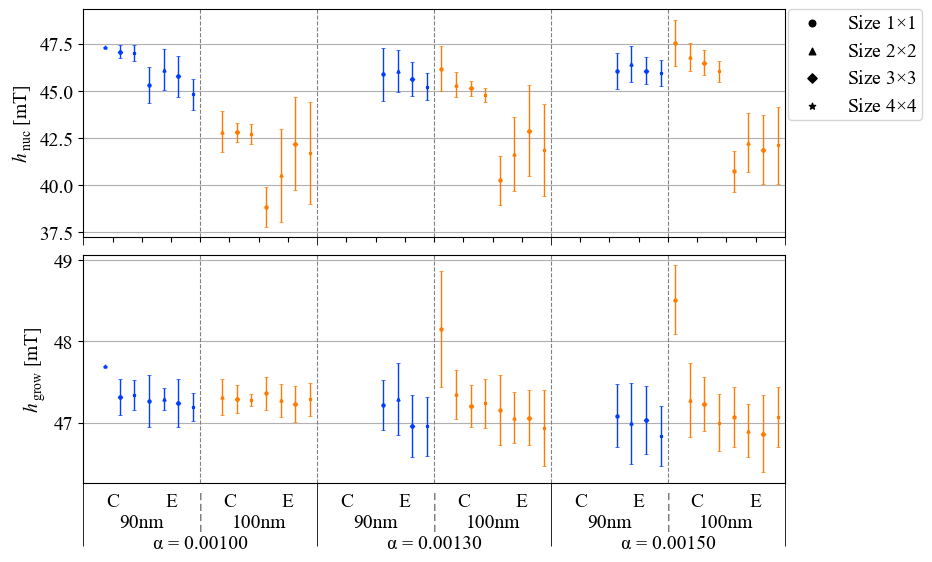

In [4]:
# Get field strengths size 3-4dis filtered
defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'] 
defect_magnet_types = [2,3]
disorder = 0.03

if disorder==0.03:
    alphas = [0.001,0.0013,0.0015]
    success_indxs = {
        0.001: 
        {2: [
        [],[23],[2,7,11,13,17,23],[1,13,15,16,22,],
        [7,8,9,10,11,13,14,18,19,24],[0,1,4,10,11,17,20,23],[1,5,6,8,11,13,15,17,24],[1,5,7,9,10,12,13,14,21,24]],
        3:[
        [],[2,10,11,12,18,24],[2,5,8,12,16,18,20,22],[2,3,9,10,12,16,19,22,24],
        [2,4,5,11,17],[2,3,4,7,16,20,23],[0,1,2,5,6,9,12,16,20,23,24],[1,3,4,5,6,7,8,9,11,13,15,21,22,23]]
        }, 
        0.0013: 
        {2: [
        [],[],[],[],
        [0,1,3,4,5,6,7,8,10,13,14,15,16,17,18,19,20,21,23,24],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,24],[1,2,3,4,5,6,8,9,10,11,12,15,16,17,18,19,20,21,22,24],[1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]], 
        3:[
        [1,2,5,10,11,14],[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,20,21,23,24],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,20,21,23],[0,1,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24],
        [1,3,4,6,7,8,9,10,11,14,15,16,17,18,19,20,21,22,23,24],[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24],[0,1,2,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
        },
        0.0015: 
        {2: [
        [],[],[],[],
        [0,2,3,4,6,8,10,11,12,13,14,16,17,18,19,20,21,23,24],[0,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]],
        3:[
        [1,4,6,8,9,11,13,14],[0,1,2,6,7,8,10,11,12,13,15,16,17,19,20,21,24],[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24],[1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24],
        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,18,19,20,21,22,23,24],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24]]
        }
                     }
else:
    alphas = [0.0013,0.0015,0.0018]
    success_indxs = {
        0.0013: 
        {2: [
        [],[],[],[5,14,21],
        [3,5,10,11,13,14,15,16,18,20,23],[2,5,9,10,11,15,19,20,21,23],[0,1,2,8,14,18],[3,6,7,8,9,11,17,19,20,21]],
        3:[
        [21],[0,6,15],[1,2,3,9,14,20,23],[0,3,4,5,12,21],
        [4,8,10],[0,3,7,9,12,17,20],[8,10,11,13,17,22],[2,5,7,11,12,15,18,20,22,24]]
        }, 
        0.0015: 
        {2: [
        [],[],[],[],
        [0,4,7,10,15,16,17,19,20,21,22,23],[2,3,6,9,10,12,13,14,15,17,19,21,22,24],[0,2,7,9,11,12,13,14,15,18,19,21,22,23],[0,1,2,4,5,7,8,9,11,12,13,14,15,16,17,18,20,22,23,24]],
        3:[
        [],[2,5,17,18,22],[2,3,4,5,6,10,12,13,16,18,19,21,22,24],[3,5,6,8,9,12,14,15,16,18,21,22,23,24],
        [0,1,3,4,7,10,13,15,19,20,22],[0,1,2,3,5,8,9,10,11,13,14,17,18,19,22],[0,4,5,6,7,8,9,11,12,13,14,16,17,18,19,20,21,23,24],[2,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,22,23]]
        },
        0.0018: 
        {2: [
        [],[],[],[],
        [2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]],
        3:[
        [],[0,1,2,3],[0,4],[0,2],
        [0,1,2,3],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
        }
                     }
    
fig, axs = plt.subplots(2,1,figsize=[8, 5.5], sharex=True)
fig.tight_layout(h_pad=0)
xticks_minor = np.arange(len(alphas)+1)*8
xticks = np.delete(np.arange(0,len(alphas)*8+1,1),xticks_minor)
axs[1].set_xlim(0, len(alphas)*8)
axs[1].set_xticks( xticks )
axs[1].set_xticks( xticks_minor, minor=True )
axs[0].grid(axis='y')
axs[0].set_axisbelow(True)
axs[1].grid(axis='y')
axs[1].set_axisbelow(True)
for i in range(4,len(alphas)*8,4):
    axs[0].axvline(i, linestyle='--', color='gray', linewidth=0.8)
    axs[1].axvline(i, linestyle='--', color='gray', linewidth=0.8)
axs[0].tick_params( axis='x', which='minor', direction='out', length=6)
axs[1].tick_params( axis='x', which='minor', direction='out', length=45)
axs[1].tick_params( axis='x', which='major', bottom=False) 
axs[0].set_ylabel(r"$h\,_\mathrm{nuc}$ [mT]")
axs[1].set_ylabel(r"$h\,_\mathrm{grow}$ [mT]")

palette = sns.color_palette('bright', 10)
markers = ["o","^","D", "*"]
x_labels = []
i = 0.25

for alpha in alphas:
    x_labels.extend( ['C',f'\n90nm', 'E', f'¦\n¦\nα = {alpha:.5f}','C',f'\n100nm', 'E'] )
    data_df = pd.read_csv(f'Data\\Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv')
    for defect_magnet_type in defect_magnet_types:
        if defect_magnet_type==2:
            color = palette[0]
        else:
            color = palette[1]
        for defect_name in defect_names:
            marker = markers[int(defect_name[0])-1]
            case_df = data_df[(data_df['Defect_magnet_type'] == defect_magnet_type) & (data_df['Defect_name'] == defect_name)]
            H_nuc_array = np.round(case_df['H_nuc'].values*1000, 1)
            H_ext_array = np.round(case_df['H_ext'].values*1000, 1)
            defect_name_idx = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'].index(defect_name)
            H_nuc_array = H_nuc_array[success_indxs[alpha][defect_magnet_type][defect_name_idx]]
            H_ext_array = H_ext_array[success_indxs[alpha][defect_magnet_type][defect_name_idx]]
            if H_nuc_array.shape[0] != 0: 
                nuc_mean = np.mean(H_nuc_array)
                nuc_std = np.std(H_nuc_array)
                if 2<i<4:
                    axs[0].scatter(i,nuc_mean,color='black',marker=marker,s=0.1, label=f"Size {defect_name[0]}"+r'$\times$'+f"{defect_name[0]}")
                axs[0].errorbar(i, nuc_mean, nuc_std, color=color, marker=marker, ms=2.2, elinewidth=1, capsize=1.5, capthick=0.5) 
            if H_ext_array.shape[0] != 0:
                ext_mean = np.mean(H_ext_array)
                ext_std = np.std(H_ext_array)     
                axs[1].errorbar(i, ext_mean, ext_std, color=color, marker=marker, ms=2.2, elinewidth=1, capsize=1.5, capthick=0.5)
            i+=0.5

axs[1].set_xticklabels( x_labels )
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.967), markerscale=15, borderpad=0.25)  
fig.savefig(f"Rainbow\\{disorder}dis_plot.png", bbox_inches='tight', dpi=1000)

plt.show()         

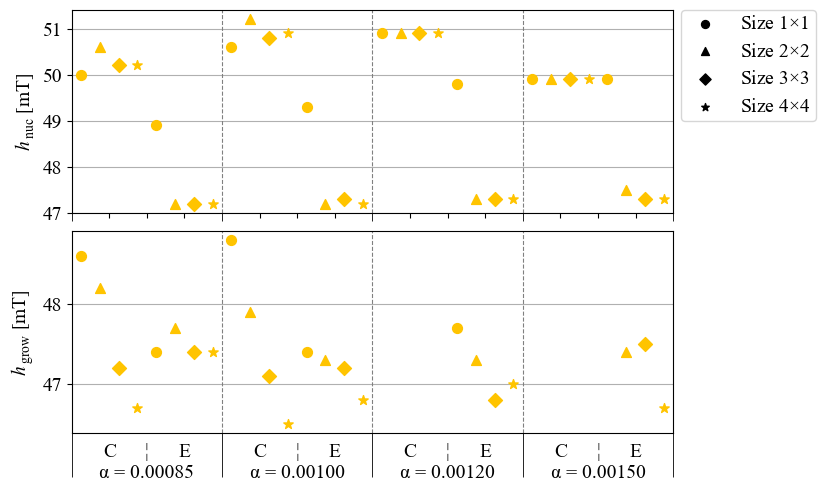

In [220]:
# Get field strengths angle
defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e'] 
alphas = [0.00085,0.001,0.0012,0.0015]
disorder = 0

fig, axs = plt.subplots(2,1,figsize=[7, 5], sharex=True)
fig.tight_layout(h_pad=0)
xticks_minor = np.arange(len(alphas)+1)*4
xticks = np.delete(np.arange(0,len(alphas)*4+1,1),xticks_minor)
axs[1].set_xlim(0, len(alphas)*4)
axs[1].set_xticks( xticks )
axs[1].set_xticks( xticks_minor, minor=True )
axs[0].grid(axis='y')
axs[0].set_axisbelow(True)
axs[1].grid(axis='y')
axs[1].set_axisbelow(True)
for i in range(4,len(alphas)*4,4):
    axs[0].axvline(i, linestyle='--', color='gray', linewidth=0.8)
    axs[1].axvline(i, linestyle='--', color='gray', linewidth=0.8)
axs[0].tick_params( axis='x', which='minor', direction='out', length=6)
axs[1].tick_params( axis='x', which='minor', direction='out', length=32)
axs[1].tick_params( axis='x', which='major', bottom=False) 
axs[0].set_ylabel(r"$h\,_\mathrm{nuc}$ [mT]")
axs[1].set_ylabel(r"$h\,_\mathrm{grow}$ [mT]")

palette = sns.color_palette('bright', 10)
markers = ["o","^","D", "*"]
x_labels = []
i = 0.25
color = palette[8]

for alpha in alphas:
    x_labels.extend( ['C',f'¦\nα = {alpha:.5f}','E'] )
    data_df = pd.read_csv(f'Data\\Angle_Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv')
    for defect_name in defect_names:
        marker = markers[int(defect_name[0])-1]
        case_df = data_df[(data_df['Defect_name'] == defect_name)]
        H_nuc_array = np.round(case_df['H_nuc'].values*1000, 1)
        H_ext_array = np.round(case_df['H_ext'].values*1000, 1)
        if i<2:
            axs[0].scatter(i,H_nuc_array[0],color='black',marker=marker,s=0.1, label=f"Size {defect_name[0]}"+r'$\times$'+f"{defect_name[0]}")
        axs[0].scatter([i]*H_nuc_array.shape[0],H_nuc_array,color=color,marker=marker,s=50)
        for val in H_ext_array:
            if val not in [20.1, 40.1]:
                axs[1].scatter(i,val,color=color,marker=marker,s=50)
        i+=0.5

axs[1].set_xticklabels( x_labels )
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.964), markerscale=18, borderpad=0.25)  
fig.savefig(f"Rainbow\\Angle_{disorder}dis_plot.png", bbox_inches='tight', dpi=1000)

plt.show()  

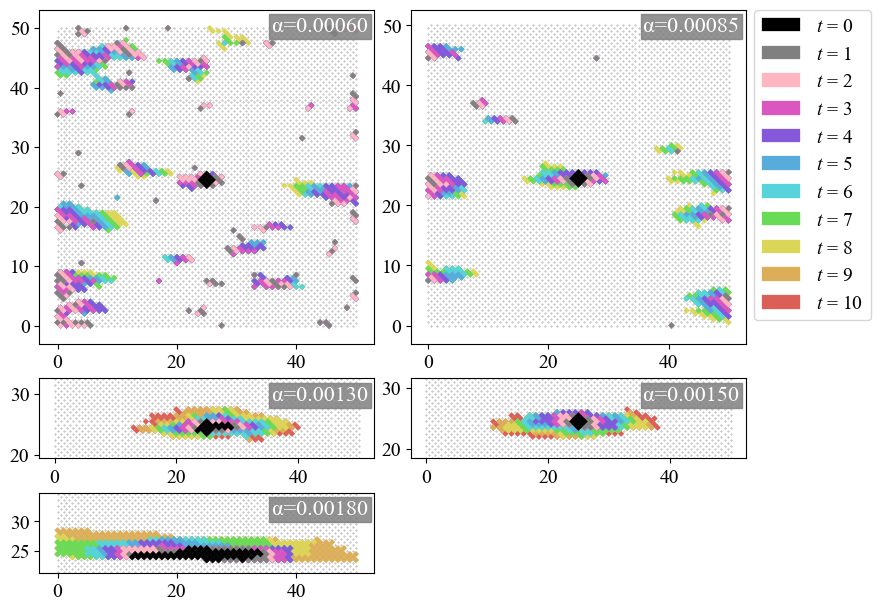

In [108]:
# Fractured vs connected rainbow plot:

def plot_rainbow(points, color, ax, label="", linewidth=0.2, legend=True): 
    for j,pt in enumerate(points):
        pad = 0.5
        x = [pt[0]-pad, pt[0], pt[0]+pad, pt[0]]
        y = [pt[1], pt[1]-pad, pt[1], pt[1]+pad]
        if j==0 and legend:
            ax.fill(x,y,c=color, label=label, linewidth=linewidth, edgecolor=color)
        else:
            ax.fill(x,y,c=color, linewidth=linewidth, edgecolor=color)
        
defect_name = '3c'
defect_magnet_type = 3
disorder = 0.04
alphas = [0.0006, 0.00085, 0.0013, 0.0015, 0.0018]
runs = [1,3,3,2,4]
rainbow_idxs = [9,9,11,11,10]

pos = model.pos
defect_idxs = defect_idxs_dict_n50[defect_name]

palette = ['silver']
test = sns.color_palette("hls",20)
palette.extend([test[0], test[2], test[3], test[6], test[10], test[11]]) #, test[16], test[19]
test = sns.color_palette("hls",7)[-1]
palette.extend(sns.color_palette("hls",7)[5:])
palette.extend(['lightpink','gray','black'])
palette = palette[::-1]

fig, axs = plt.subplots(3,2,figsize=[8, 6.4],height_ratios=[25,6,6]) 
fig.tight_layout(h_pad=0, w_pad=-0.75)
axs = axs.flatten()


for i,alpha in enumerate(alphas):
    pickle_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_Defect_magnet_type{defect_magnet_type}_{defect_name}.pickle'
    with open(pickle_path, 'rb') as file:
        _ = pickle.load(file)
        _ = pickle.load(file)
        _ = pickle.load(file)
        flipped_grow_list = pickle.load(file)
    
    axs[i].scatter(pos[:,0], pos[:,1], s=0.1, c='gray', alpha=0.9)
    run_num = runs[i]
    for idx in reversed(range(rainbow_idxs[i])):
        plot_rainbow(pos[flipped_grow_list[run_num][idx]], palette[idx], axs[i], label= f"$t$ = {idx}")
    axs[i].axis('equal')

axs[0].text(44, 50.3,'α=0.00060', c='w', fontsize=16, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
axs[1].text(43.8, 49.8,'α=0.00085', c='w', fontsize=16, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
axs[2].text(43.6, 29.8,'α=0.00130', c='w', fontsize=16, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
axs[3].text(43.55, 28.8,'α=0.00150', c='w', fontsize=16, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
axs[4].text(44, 32,'α=0.00180', c='w', fontsize=16, ha='center', va='center', bbox=dict(facecolor='gray', edgecolor='gray', pad=2, alpha= 0.85)) 
      
axs[2].set_ylim(20,32)
axs[3].set_ylim(19,31)
axs[4].set_ylim(22,34)
axs[5].set_axis_off()
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.972), reverse = True)  
fig.savefig(f"Rainbow\\{disorder}dis_frac_plot.png", bbox_inches='tight', dpi=1000)


C:\Users\eivhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyopencl\cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


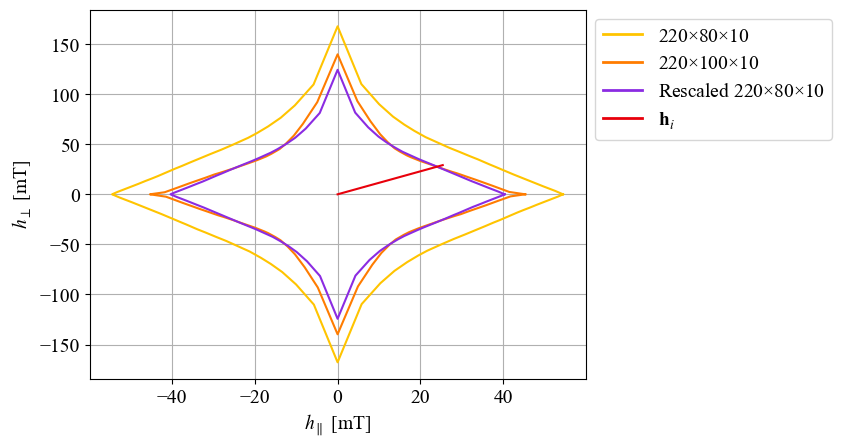

array([0.12431198])

In [50]:
# Size implementation plot 
def get_hc_plot(model, hc_old, simulation_dict, normal_case, defects_idxs, defect_case):
    "Set hc adjusted for shape."
    h_tot_defects = model.total_fields()[defects_idxs]
    acute_angles = np.arctan2(np.abs(h_tot_defects[...,1]), np.abs(h_tot_defects[...,0])) 
    angles_normal,h_normal = simulation_dict[normal_case]['angles'], simulation_dict[normal_case]['h']
    angles_defect,h_defect = simulation_dict[defect_case]['angles'], simulation_dict[defect_case]['h']
    
    hc_new = np.zeros(shape=len(defects_idxs))
    for jj,j in enumerate(defects_idxs):
        idx_defect = h_defect[(np.abs(angles_defect - acute_angles[jj])).argmin()]
        idx_normal = h_normal[(np.abs(angles_normal - acute_angles[jj])).argmin()]
        hc_new[jj] = hc_old*idx_defect/idx_normal

    # Plot
    h_par_normal,h_perp_normal = 1000*simulation_dict[normal_case]['h_par'], 1000*simulation_dict[normal_case]['h_perp']
    h_par_defect,h_perp_defect = 1000*simulation_dict[defect_case]['h_par'], 1000*simulation_dict[defect_case]['h_perp']
    h_par_normal = np.concatenate([h_par_normal,np.flip(-h_par_normal),-h_par_normal,np.flip(h_par_normal)])
    h_perp_normal = np.concatenate([h_perp_normal,np.flip(h_perp_normal),-h_perp_normal,np.flip(-h_perp_normal)])
    h_par_defect = np.concatenate([h_par_defect,np.flip(-h_par_defect),-h_par_defect,np.flip(h_par_defect)])
    h_perp_defect = np.concatenate([h_perp_defect,np.flip(h_perp_defect),-h_perp_defect,np.flip(-h_perp_defect)])

    fig, ax = plt.subplots()
    plt.plot(h_par_normal, h_perp_normal, label=r"220$\times$80$\times$10", color=palette_tab10[1])
    plt.plot(h_par_defect, h_perp_defect, label=r"220$\times$100$\times$10", color=palette_tab10[3])
    plt.plot(hc_new[-1]/hc_old*h_par_normal, hc_new[-1]/hc_old*h_perp_normal, label=r"Rescaled 220$\times$80$\times$10", color=palette_tab10[4])
    plt.plot([0,1000*np.abs(h_tot_defects[...,0])[-1]], [0,1000*np.abs(h_tot_defects[...,1])[-1]], label=r"$\mathbf{h}_i$", color=palette_tab10[5])
    # plt.axis('equal')
    plt.xlabel('$h_\parallel$ [mT]')
    plt.ylabel('$h_\perp$ [mT]')
    plt.grid()
    leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    for legobj in leg.legend_handles:
        legobj.set_linewidth(2.0)
    fig.savefig('Plots\\Size implementation.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
    fig.savefig('Plots\\Size implementation.png', bbox_extra_artists=(leg,), bbox_inches='tight')
    plt.show()
    return hc_new

defect_magnet_type, defect_name = 3, '1c'
H_nuc = 0.03
h_nuc = np.array([H_nuc*np.cos(np.deg2rad(theta_nuc)), H_nuc*np.sin(np.deg2rad(theta_nuc))])
model.set_h_ext(h_nuc)
get_hc_plot(model, hc, simulation_dict, normal_magnet_type, defect_idxs_dict_n50[defect_name], defect_magnet_type)

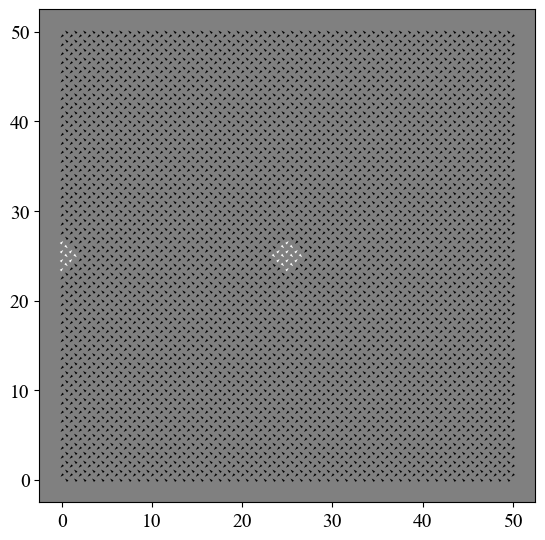

In [116]:
# Plot defects
fig, ax = plt.subplots(figsize=[6.4,6.4])
ax.set_facecolor("Gray")
model.polarize(-1)
model.flip([2373, 2424, 2474, 2475, 2525, 2526, 2575, 2576, 2626, 2676,2398, 2448, 2449, 2498, 2499, 2500, 2548, 2549, 2550, 2551, 2599, 2600, 2601, 2650, 2651, 2701])
C = (model.vectors[...,0]>0)*256
ax.clear()
ax.quiver(model.pos[:,0],model.pos[:,1], model.vectors[...,0], model.vectors[...,1], color=cm.gray(C), pivot='mid')
fig.savefig('Plots\\ASI defects2.png', bbox_inches='tight') 

In [21]:
# Do step in stead of relax to check order

H_nuc = 0.07
html_list = []
for defect_magnet_type, defect_name in tqdm(defect_list, desc ="Run", position=0, leave=True):
    defect_idxs = defect_idxs_dict_n50[defect_name]
    data = []

    if disorder != 0:
        pickle_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_Defect_magnet_type{defect_magnet_type}_{defect_name}.pickle' 
        with open(pickle_path, 'rb') as file:
            _ = pickle.load(file)
            threshold_dist_list = pickle.load(file)
    else:
        threshold_dist_list = [1]*run_range

    for id in range(run_range):
        flipped_list = []
        threshold_dist = threshold_dist_list[id]
        model.polarize(-1)
        h_nuc = np.array([H_nuc*np.cos(np.deg2rad(theta_nuc)), H_nuc*np.sin(np.deg2rad(theta_nuc))])
        model.set_h_ext(h_nuc)

        threshold = np.ones(shape=model.spin_count)*hc
        threshold[defect_idxs] = get_hc(model, hc, simulation_dict, normal_magnet_type, defect_idxs, defect_magnet_type)
        threshold = threshold*threshold_dist
        model.set_threshold(threshold)

        for i in range(len(defect_idxs)+3):
            model.step() 
            flipped_list.append(np.argwhere(model.spin>0).flatten().tolist())
        data.append(flipped_list)
    range_list = [0]
    for i in range(len(data)): range_list.append(range_list[-1]+len(data[i]))
    range_list = range_list[1:]
    data = [j for i in data for j in i]
    fig, ax = plt.subplots(figsize=[4.8,4.8])
    ax.set_facecolor("Gray")
    anim = FuncAnimation(fig, plot_gray, frames=len(data), fargs=(model, data, ax, defect_magnet_type, defect_name, range_list), interval=500)
    plt.close()
    html_list.append(HTML(anim.to_jshtml()))

with open(f'Data\\Alpha{alpha}_Dis{disorder}\\Step alpha{alpha}_Dis{disorder}.html', 'w') as f:
    for j,a in enumerate(html_list):
        f.write(a.data)


Run:   0%|          | 0/8 [00:00<?, ?it/s]C:\Users\eivhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyopencl\cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(
Run: 100%|██████████| 8/8 [01:19<00:00,  9.90s/it]


In [23]:
# Try without nuc

H_nuc = 0.049
html_list = []
for defect_magnet_type, defect_name in tqdm(defect_list, desc ="Run", position=0, leave=True):
    defect_idxs = defect_idxs_dict_n50[defect_name]
    data = []

    if disorder != 0:
        pickle_path = f'Data\\Alpha{alpha}_Dis{disorder}\\Alpha{alpha}_Dis{disorder}_Defect_magnet_type{defect_magnet_type}_{defect_name}.pickle' 
        with open(pickle_path, 'rb') as file:
            _ = pickle.load(file)
            threshold_dist_list = pickle.load(file)
    else:
        threshold_dist_list = [1]*run_range

    for id in range(run_range):
        flipped_list = []
        threshold_dist = threshold_dist_list[id]
        model.polarize(-1)
        for i in range(5):
            theta_exts = [22, 338]
            for theta_ext in theta_exts:
                h_nuc = np.array([H_nuc*np.cos(np.deg2rad(theta_nuc)), H_nuc*np.sin(np.deg2rad(theta_nuc))])
                model.set_h_ext(h_nuc)

                threshold = np.ones(shape=model.spin_count)*hc
                threshold[defect_idxs] = get_hc(model, hc, simulation_dict, normal_magnet_type, defect_idxs, defect_magnet_type)
                threshold = threshold*threshold_dist
                model.set_threshold(threshold)

                model.relax()
                flipped_list.append(np.argwhere(model.spin>0).flatten().tolist())
        data.append(flipped_list)
    range_list = [0]
    for i in range(len(data)): range_list.append(range_list[-1]+len(data[i]))
    range_list = range_list[1:]
    data = [j for i in data for j in i]
    fig, ax = plt.subplots(figsize=[4.8,4.8])
    ax.set_facecolor("Gray")
    anim = FuncAnimation(fig, plot_gray, frames=len(data), fargs=(model, data, ax, defect_magnet_type, defect_name, range_list), interval=500)
    plt.close()
    html_list.append(HTML(anim.to_jshtml()))

with open(f'Data\\Alpha{alpha}_Dis{disorder}\\No nuc alpha{alpha}_Dis{disorder}.html', 'w') as f:
    for j,a in enumerate(html_list):
        f.write(a.data)


Run:   0%|          | 0/16 [00:00<?, ?it/s]C:\Users\eivhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyopencl\cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(
Run: 100%|██████████| 16/16 [29:17<00:00, 109.84s/it]


In [25]:
# Get initial naive success rate
defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e']
defect_magnet_types = [2,3]
success_list = []

data_df = pd.read_csv(f'Data\\Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv')
#print(data_df.keys())
for defect_magnet_type in defect_magnet_types:
    for defect_name in defect_names:
        case_df = data_df[(data_df['Defect_magnet_type'] == defect_magnet_type) & (data_df['Defect_name'] == defect_name)]    #.str.strip()
        success = sum(case_df['Success'].replace({True: 'True', False: 'False'})=='True'), sum(case_df['Success'].replace({True: 'True', False: 'False'})=='False'), sum(case_df['Success']=='Fail')
        partial_success = sum(case_df['Partial_success'].replace({True: 'True', False: 'False'})=='True'), sum(case_df['Partial_success'].replace({True: 'True', False: 'False'})=='False'), sum(case_df['Partial_success']=='Fail') 
        success_list.append(pd.DataFrame({'Defect_magnet_type':defect_magnet_type, 'Defect_name': defect_name, 'Success':[success], 'Partial_success':[partial_success]}))
        
success_df = pd.concat(success_list, ignore_index=True) 
success_df

,Defect_magnet_type,Defect_name,Success,Partial_success
0,2,1c,"(0, 0, 0)","(0, 0, 0)"
1,2,2c,"(0, 5, 0)","(1, 4, 0)"
2,2,3c,"(0, 0, 0)","(0, 0, 0)"
3,2,4c,"(0, 5, 0)","(3, 2, 0)"
4,2,1e,"(0, 0, 0)","(0, 0, 0)"
5,2,2e,"(0, 5, 0)","(1, 4, 0)"
6,2,3e,"(0, 0, 0)","(0, 0, 0)"
7,2,4e,"(1, 4, 0)","(1, 4, 0)"
8,3,1c,"(0, 0, 0)","(0, 0, 0)"
9,3,2c,"(0, 5, 0)","(4, 1, 0)"


False


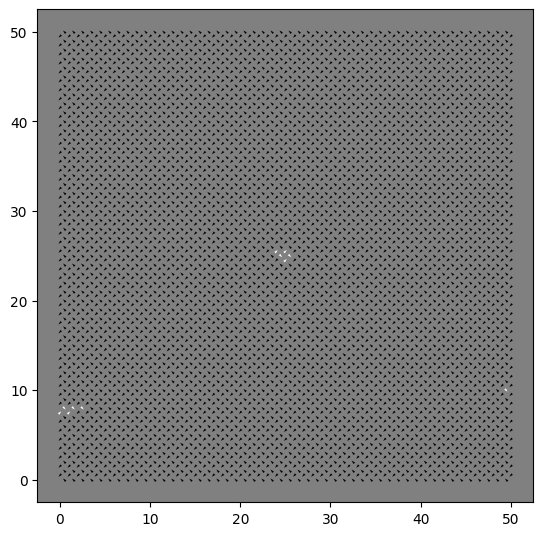

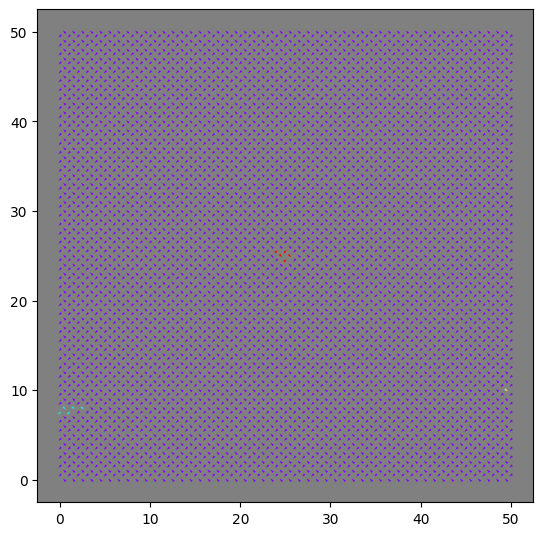

,Cluster_id,Spin,Num_defects,Num_flipped,Num_edges
0,0,-1,0,5089,393
1,1,1,0,5,2
2,2,1,0,1,1
3,3,1,4,5,0


In [19]:
# Cluster algoritm

# defect_names = ['1c', '2c', '3c', '4c', '1e', '2e', '3e', '4e']
# defect_magnet_types = ['2','3']
# success_list = []

defect_name = '2c'
defect_magnet_type = 2
defect_idxs = defect_idxs_dict_n50[defect_name]
data_df = pd.read_csv(f'Data\\Alpha{alpha}_Dis{disorder}\\Nuc_Alpha{alpha}_Dis{disorder}.csv')
case_df = data_df[(data_df['Defect_magnet_type'] == defect_magnet_type) & (data_df['Defect_name'] == defect_name)]
flipped = case_df['Flipped'].apply(literal_eval)
case_idx = 9
print(case_df['Success'][case_idx])
flipped = flipped[case_idx][-1]

def cluster_algorithm(flipped, defect_idxs):
    "Input list of flipped magnets and defects, return which cluster they belong to. Assumes size n50."
    model = PinwheelSpinIceDiamond(size=(50,50), use_opencl=True, neighbor_distance=1)
    edge_idxs = np.unique(np.concatenate([model.L[:,-2][::2], model.L[:,0:1], model.L[0:2], model.L[-2:-1], model.L[-1], model.L[:,-1]]))
    model.polarize(-1)
    model.flip(flipped)
    spin = model.spin
    
    N = spin.shape[0]
    from_array = np.repeat(np.arange(N), 8)     #480 for (5,5)
    to_array = model._neighbor_list.flatten()
    from_array = from_array[to_array>=0]        #Non-periodic
    to_array = to_array[to_array>=0]            #8*4 + 12*5 + 16*7 + 24*8 = 396
    bonds = np.where(spin[from_array]==spin[to_array], 1, 0)

    graph = csr_matrix((bonds, (from_array, to_array)), shape=(N, N))
    graph = graph + graph.T
    N_components, labels = connected_components(graph, directed=False)

    cluster_data = []
    for id in range(N_components):
        idxs = np.argwhere(labels==id)
        cluster_data.append(pd.DataFrame({'Cluster_id': id, 'Spin': spin[idxs[0]][0], 'Num_defects': np.intersect1d(idxs, defect_idxs).shape[0], 'Num_flipped': idxs.shape[0], 'Num_edges': np.intersect1d(idxs, edge_idxs).shape[0]}, index=[id]))
    cluster_data = pd.concat(cluster_data)  

    C = (model.vectors[...,0]>0)*256
    fig, ax = plt.subplots(figsize=[6.4,6.4])
    ax.set_facecolor("Gray")
    ax.quiver(model.pos[:,0],model.pos[:,1], model.vectors[...,0], model.vectors[...,1], color=cm.gray(C), pivot='mid')
    plt.show()

    C = labels*int(256/(N_components-1))
    fig, ax = plt.subplots(figsize=[6.4,6.4])
    ax.set_facecolor("Gray")
    ax.quiver(model.pos[:,0],model.pos[:,1], model.vectors[...,0], model.vectors[...,1], color=cm.rainbow(C), pivot='mid')
    plt.show()
    return cluster_data

cluster_data = cluster_algorithm(flipped, defect_idxs)
cluster_data #['Num_flipped']


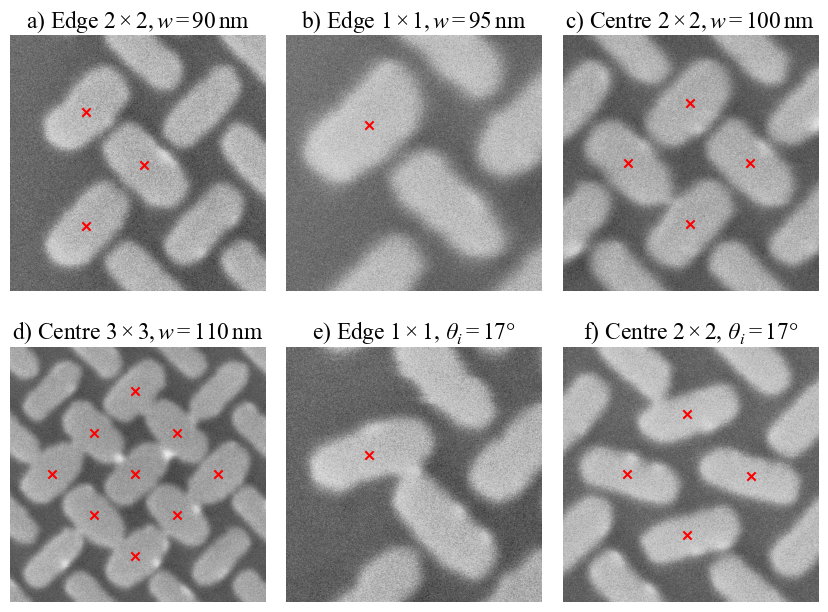

In [52]:
# SEM images
import glob
from matplotlib import image as img
from matplotlib.patches import Rectangle

sem_image_path = 'C:/Users/eivhe/OneDrive/NTNU/Prosjekt- og masteroppgave/Measurements/SEM images/*.tif'
image_path_list = glob.glob(sem_image_path)
image_path_list = [image_path_list[i] for i in [3,2,0,1,5,4]]

image_array = []
for path in image_path_list:
    image = img.imread(path)
    image_array.append(image) 
image_array = np.array(image_array) 
crop_list = [[540,1210, 1200,1870],[500,1200,1170,1870],[550,1350,1080,1880],[370,1290,1050,1970],[650,1300,1150,1800],[490,1290,1180,1980]] 
image_array = [image_array[i][crop_list[i][0]:crop_list[i][1],crop_list[i][2]:crop_list[i][3]] for i in range(6)]
# for i in image_path_list: print(i[80:])

labels = [r"a) Edge $2 \times 2, w = 90\,$nm", 
          r"b) Edge $1 \times 1, w = 95\,$nm", 
          r"c) Centre $2 \times 2, w = 100\,$nm", 
          r"d) Centre $3 \times 3, w = 110\,$nm",
          r"e) Edge $1 \times 1, \,\theta_i=17\degree$",
          r"f) Centre $2 \times 2, \,\theta_i=17\degree$"]

points = [ [[200,350,200],[200, 340, 500]], 
          [[225],[245]], 
          [[205,400,400,585],[400,210,590,400]], 
          [[450,301,600,152,450,749,301,600,450],[160,309,309,458,458,458,607,607,755]], 
          [[210],[275]], 
          [[200,390,390,590],[400,210,590,405]] ]

fig, axs = plt.subplots(2,3,figsize=[8.5,6.7],layout='tight')
axs = axs.flatten()
for j,image in enumerate(image_array):
    axs[j].set_axis_off()
    axs[j].imshow(image, cmap='Greys_r') 
    axs[j].set_title(labels[j])
    axs[j].scatter(points[j][0], points[j][1], marker="x", c='r')
    
fig.savefig('Plots\\SEM.pdf', bbox_inches='tight')
fig.savefig('Plots\\SEM.png', bbox_inches='tight')
plt.show()

# Crop testing:
if False:
    image = image_array[5]
    inches = 5
    fig, ax = plt.subplots()
    shape = image.shape
    fig.set_size_inches(inches*shape[1]/np.min(shape),inches*shape[0]/np.min(shape))
    ax.set_axis_off()
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
    im = ax.imshow(image, cmap='Greys_r') 
    ax.add_patch(Rectangle((1150, 650), 650, 650, edgecolor="black", facecolor='none'))    
    plt.show()

100%|██████████| 50/50 [23:55<00:00, 28.71s/it]


0.049640000000000045 0.00024979991993594305
50


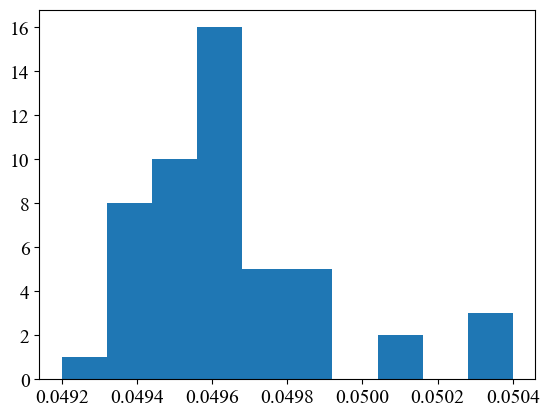

In [128]:
# Coercive fields
size = 50
normal_magnet_type = 1
s = 30e-9
neighbour_dist = 10
info = simulation_dict[normal_magnet_type]
l,w,t = info['l']*1e-9,info['w']*1e-9,info['t']*1e-9
hc,b,c,beta,gamma = info['hc'],info['b'],info['c'],info['beta'],info['gamma']
model_params = {
    'size': (size,size), 
    'hc': hc, 
    'sw_b': b, 
    'sw_c': c,
    'sw_beta': beta,
    'sw_gamma': gamma,
    'alpha': 0.00130, 
    'use_opencl': True,
    'neighbor_distance': neighbour_dist,
}
model = PinwheelSpinIceDiamond(**model_params)

run_range = 50
coercieve_fields = []

for i in tqdm(range(run_range)):
    model.polarize(-1)
    threshold = np.random.normal(loc=1,scale=0.04,size=model.spin_count)*hc
    model.set_threshold(threshold)
    spin0 = np.sum(model.spin)
    H_nuc = 0.048
    while np.sum(model.spin)!= -spin0 and H_nuc<0.06:
        H_nuc += 0.0001
        model.set_h_ext([H_nuc, 0])
        model.relax()
    if np.sum(model.spin) == -spin0 and H_nuc != 0.0451:
        coercieve_fields.append(H_nuc)

coercieve_fields = np.array(coercieve_fields) 

mean = np.mean(coercieve_fields)
std = np.std(coercieve_fields)
print(mean, std)
print(coercieve_fields.shape[0])

plt.hist(coercieve_fields)
plt.show()

# 100%|██████████| 50/50 [23:55<00:00, 28.71s/it]
# 0.049640000000000045 0.00024979991993594305
# 50